# Filtering atlas: Wang

<div class="alert alert-warning">

**What this notebook does**

In this notebook, the h5ad files of Altena et al. will be filtered based on previously calculated quality control metrics such as doublet score, total counts, and percentages mitochondrial and ribosomal counts. Resulting datasets are written to filtered_[atlas_name]_base.h5ad files.
</div>  

### Loading libraries
Using sc2_seurat environment

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/bin/python
3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=9, releaselevel='final', serial=0)


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))#embed HTML within IPython notebook and make containers 90% of screen
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white') #figure resolution and background color

# This is used
# os.path.join('data/'+object_names[i][6:10]+'_preprocessed.h5ad')
#sc.logging.print_versions()

## Load data
The filtered .h5ad  files from preprocessing section.

In [3]:
path='/home/hers_basak/jjiang/jack/outputs/deliverables/1_preprocessing/data/preprocessed_wang_S'
suffix='.h5ad'

S06=f'{path}06{suffix}'
S07=f'{path}07{suffix}'
S09=f'{path}09{suffix}'
S11=f'{path}11{suffix}'
S16=f'{path}16{suffix}'
S22=f'{path}22{suffix}'
S23=f'{path}23{suffix}'
S24=f'{path}24{suffix}'
S33=f'{path}33{suffix}'
S36=f'{path}36{suffix}'


In [4]:
!ls /home/hers_basak/jjiang/jack/outputs/deliverables/1_preprocessing/data/

preprocessed_agarwal_GSM4157068.h5ad   preprocessed_siletti_2022_S375_8.h5ad
preprocessed_agarwal_GSM4157069.h5ad   preprocessed_siletti_2022_S376_1.h5ad
preprocessed_agarwal_GSM4157070.h5ad   preprocessed_siletti_2022_S376_2.h5ad
preprocessed_agarwal_GSM4157072.h5ad   preprocessed_siletti_2022_S377_7.h5ad
preprocessed_agarwal_GSM4157074.h5ad   preprocessed_siletti_2022_S377_8.h5ad
preprocessed_agarwal_GSM4157076.h5ad   preprocessed_siletti_2022_S378_3.h5ad
preprocessed_agarwal_GSM4157078.h5ad   preprocessed_siletti_2022_S378_4.h5ad
preprocessed_altena_g004.h5ad	       preprocessed_siletti_2022_S378_5.h5ad
preprocessed_altena_g005.h5ad	       preprocessed_siletti_2022_S378_6.h5ad
preprocessed_altena_g011.h5ad	       preprocessed_siletti_2022_S389_3.h5ad
preprocessed_altena_g012.h5ad	       preprocessed_siletti_2022_S389_4.h5ad
preprocessed_altena_g013.h5ad	       preprocessed_smajic_SRR12621867.h5ad
preprocessed_altena_g014.h5ad	       preprocessed_smajic_SRR12621868.h5ad
preprocessed_

In [5]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/outputs/deliverables/2_filtering')

In [6]:
os.getcwd()

'/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/2_filtering'

In [7]:
!ls

data


In [8]:
files = [S06,S07,S09,S11,S16,S22,S23,S24,S33,S36]


In [9]:
names = ['S06','S07','S09','S11','S16','S22','S23','S24','S33','S36']

In [30]:
object_names_preprocessed =list()
numberobj = len(files)

for i in range(numberobj):
    object_names_preprocessed.append("adata"+"_"+names[i]+"_"+"preprocessed")
    locals()[object_names_preprocessed[i]] = sc.read(files[i]) 
    print(object_names_preprocessed[i],' is loaded')

adata_S06_preprocessed  is loaded
adata_S07_preprocessed  is loaded
adata_S09_preprocessed  is loaded
adata_S11_preprocessed  is loaded
adata_S16_preprocessed  is loaded
adata_S22_preprocessed  is loaded
adata_S23_preprocessed  is loaded
adata_S24_preprocessed  is loaded
adata_S33_preprocessed  is loaded
adata_S36_preprocessed  is loaded


In [31]:
print(np.mean(adata_S06_preprocessed.obs[adata_S06_preprocessed.obs['predicted_doublet'] =='True']['total_counts']))

3337.075984055805


## Preprocess - Doublets

<div class="alert alert-warning">

**Important note about doublet filtering**
    
Some samples have non 'bimodal' distribution expression, which results in the automatic doublet score threshold to be very high and suspicious doublets to not be filtered out. \
    **TO DO (only when distribution is not bimodal causing the automatic threshold to be too high)** \
I decided to manually set the threshold to 0.20 to see if this captures the suspicious cells. Furthermore to see in UMAP if these cells cluster together or are more dispersed.
    

</div>  

### Check gene counts of high doublet scores
Note the graph shows counts excluding mt ones.

Due to the very high automatic thresholds for many samples (0.5-0.7), I decided to filter these samples on manual thresholds.

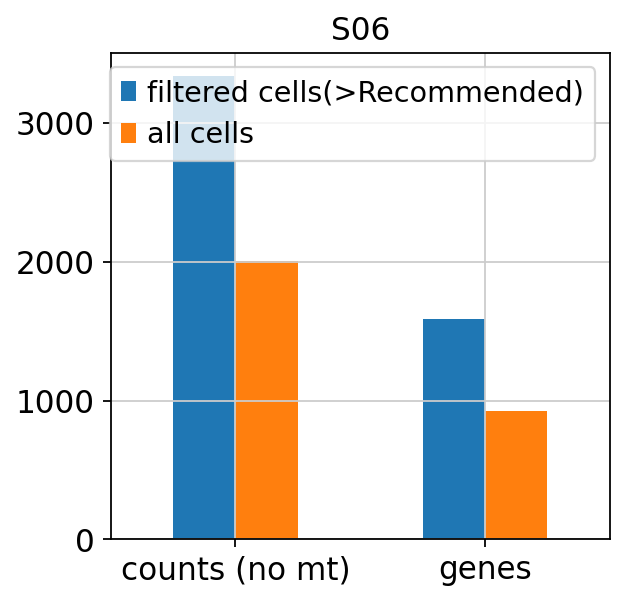

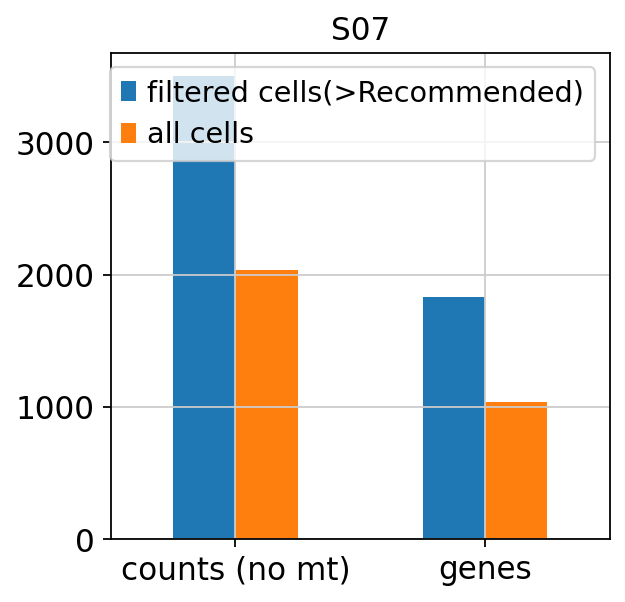

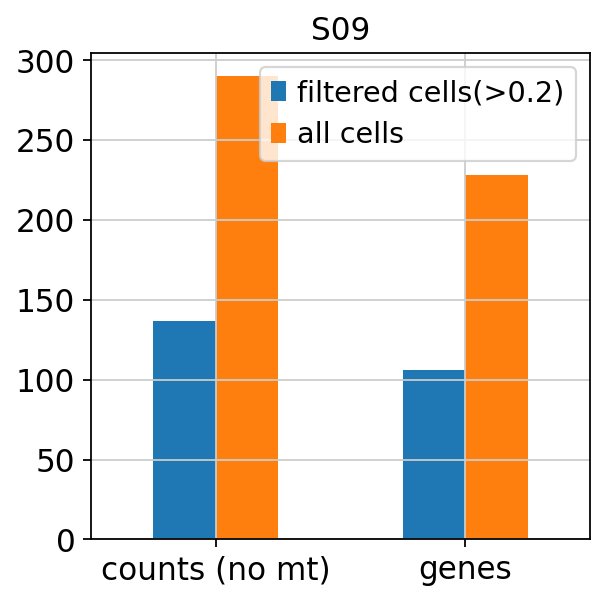

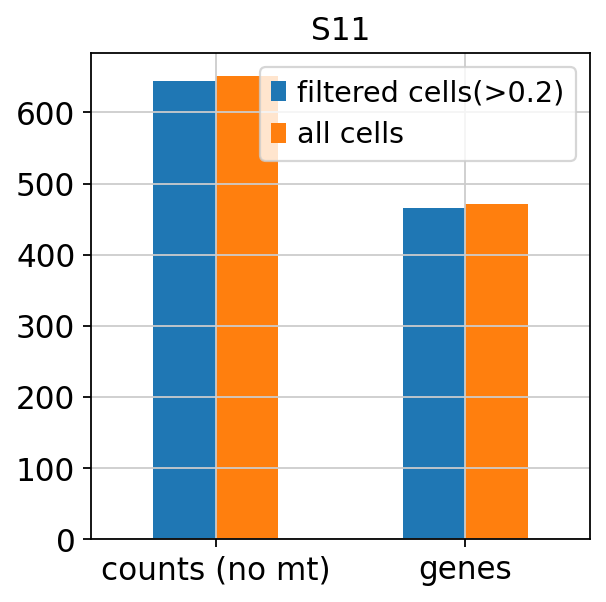

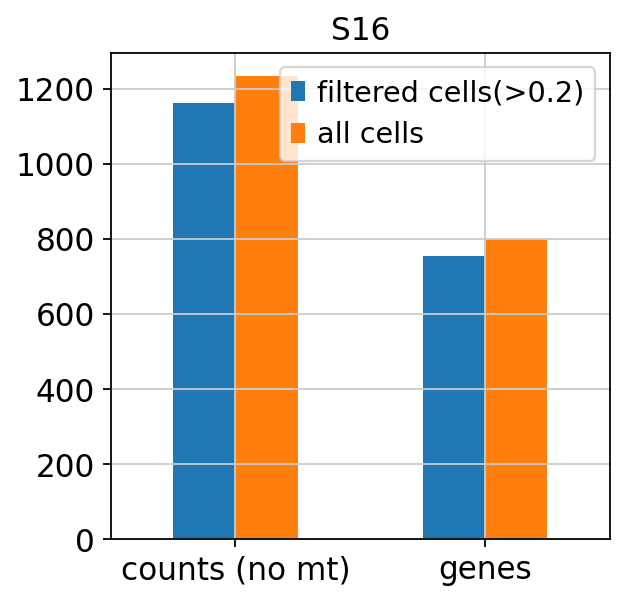

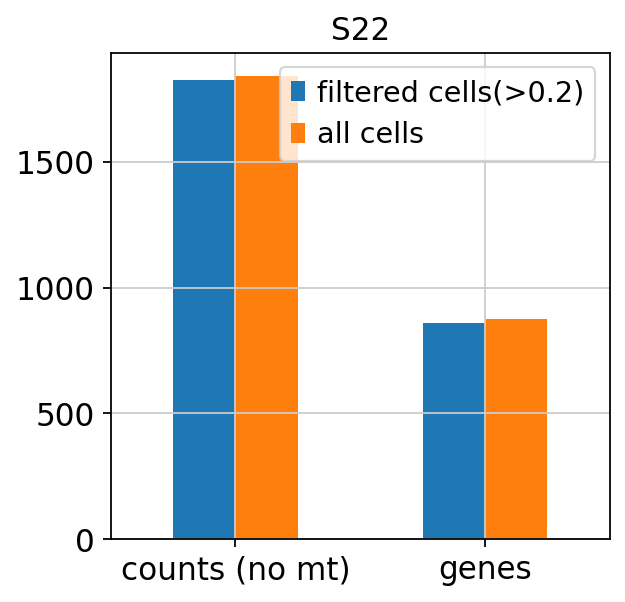

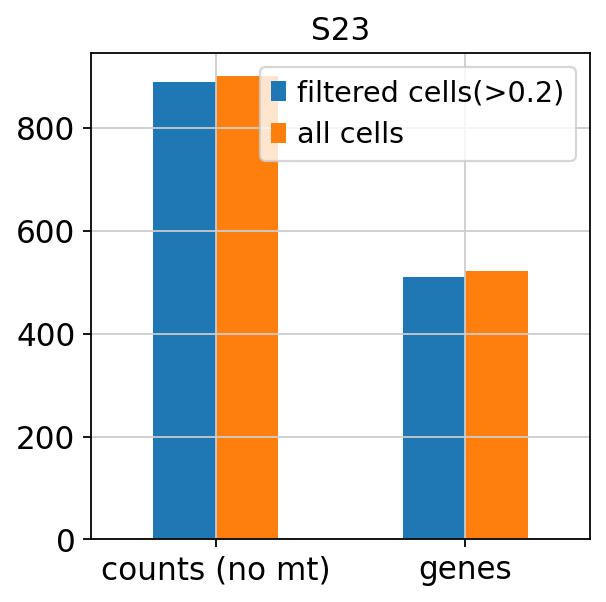

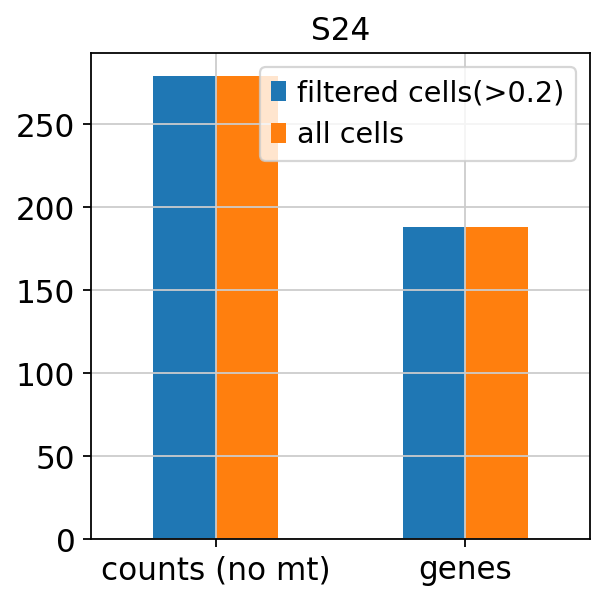

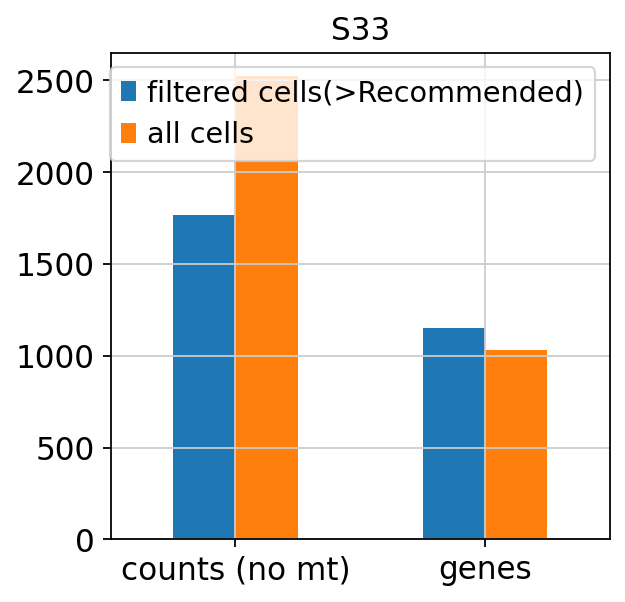

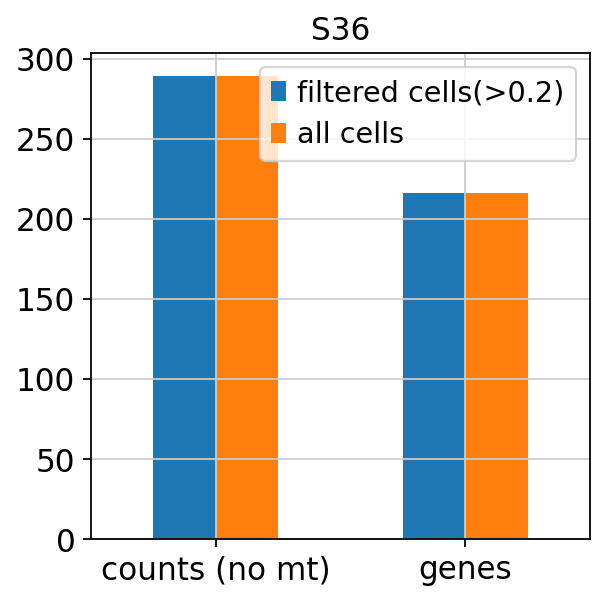

In [12]:
thr =[0.2 if i in [2,3,4,5,6,7,9] else 'Recommended' for i in range(numberobj)]
for i in range(numberobj):
    # Filter based on exception threshold rather than predicted doublet
    if i in [2,3,4,5,6,7,9]:
        mean_counts_high = int(np.mean(locals()[object_names_preprocessed[i]].obs[locals()[object_names_preprocessed[i]].obs['doublet_score'] < thr[i]]['total_counts']))
        mean_genes_high = int(np.mean(locals()[object_names_preprocessed[i]].obs[locals()[object_names_preprocessed[i]].obs['doublet_score'] <thr[i]]['n_genes']))
    else:
        mean_counts_high = float(np.mean(locals()[object_names_preprocessed[i]].obs[locals()[object_names_preprocessed[i]].obs['predicted_doublet'] =='True']['total_counts']))
        mean_genes_high = float(np.mean(locals()[object_names_preprocessed[i]].obs[locals()[object_names_preprocessed[i]].obs['predicted_doublet'] =='True']['n_genes']))
        
    mean_counts = int(np.mean(locals()[object_names_preprocessed[i]].obs['total_counts']))
    mean_genes = int(np.mean(locals()[object_names_preprocessed[i]].obs['n_genes']))
    
    
    filtered_cells = [mean_counts_high,mean_genes_high]
    all_cells = [mean_counts,mean_genes]
    index = ['counts (no mt)', 'genes']
    
    df = pd.DataFrame({f'filtered cells(>{thr[i]})': filtered_cells, 'all cells': all_cells}, index=index)
    ax = df.plot.bar(rot=0, title = f'{names[i]}')
    
    #print(locals()[object_names[i]].obs[locals()[object_names[i]].obs['doublet_score'] >0.25][['doublet_score','total_counts']])


In [13]:
np.random.seed(41)
%matplotlib inline

### Filtering - Doublets
Data points between clusters and in the middle of clusters with high count values are more likely to be doublets, but we can't be sure.

In [14]:
#max_doub_score = 0.2 

for i in range(numberobj):
    if i in [2,3,4,5,6,7,9]:
        print(object_names_preprocessed[i],': custom filtered!')
        locals()[object_names_preprocessed[i]] = locals()[object_names_preprocessed[i]][locals()[object_names_preprocessed[i]].obs['doublet_score'] < thr[i]]
    else:
        locals()[object_names_preprocessed[i]] = locals()[object_names_preprocessed[i]][locals()[object_names_preprocessed[i]].obs['predicted_doublet'] == 'False']
        print(object_names_preprocessed[i],': filtered!')

adata_S06_preprocessed : filtered!
adata_S07_preprocessed : filtered!
adata_S09_preprocessed : custom filtered!
adata_S11_preprocessed : custom filtered!
adata_S16_preprocessed : custom filtered!
adata_S22_preprocessed : custom filtered!
adata_S23_preprocessed : custom filtered!
adata_S24_preprocessed : custom filtered!
adata_S33_preprocessed : filtered!
adata_S36_preprocessed : custom filtered!


Recalculate values, especially total_counts and without ribo/mito pct change, because there is no mito genes anymore

In [15]:
for i in range(numberobj):
    sc.pp.calculate_qc_metrics(locals()[object_names_preprocessed[i]], expr_type='counts', var_type='genes', qc_vars=(), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)
    print(object_names_preprocessed[i],': updated!')

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


adata_S06_preprocessed : updated!


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


adata_S07_preprocessed : updated!
adata_S09_preprocessed : updated!
adata_S11_preprocessed : updated!


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


adata_S16_preprocessed : updated!


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


adata_S22_preprocessed : updated!


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


adata_S23_preprocessed : updated!
adata_S24_preprocessed : updated!


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


adata_S33_preprocessed : updated!
adata_S36_preprocessed : updated!


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


## Preprocess - Mitochondrial and Ribosomal counts

In [16]:
for i in range(numberobj):
    print(names[i])
    print(locals()[object_names_preprocessed[i]])

S06
AnnData object with n_obs × n_vars = 27982 × 60619
    obs: 'species', 'gender', 'age', 'atlas', 'sample', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet'
S07
AnnData object with n_obs × n_vars = 19360 × 60619
    obs: 'species', 'gender', 'age', 'atlas', 'sample', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito'
    var: 'g

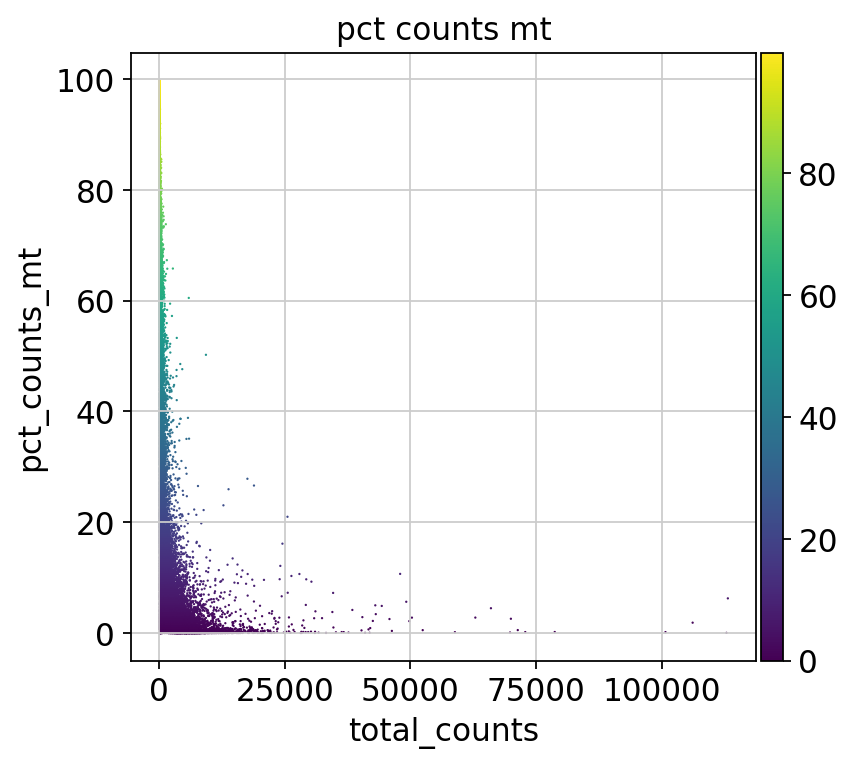

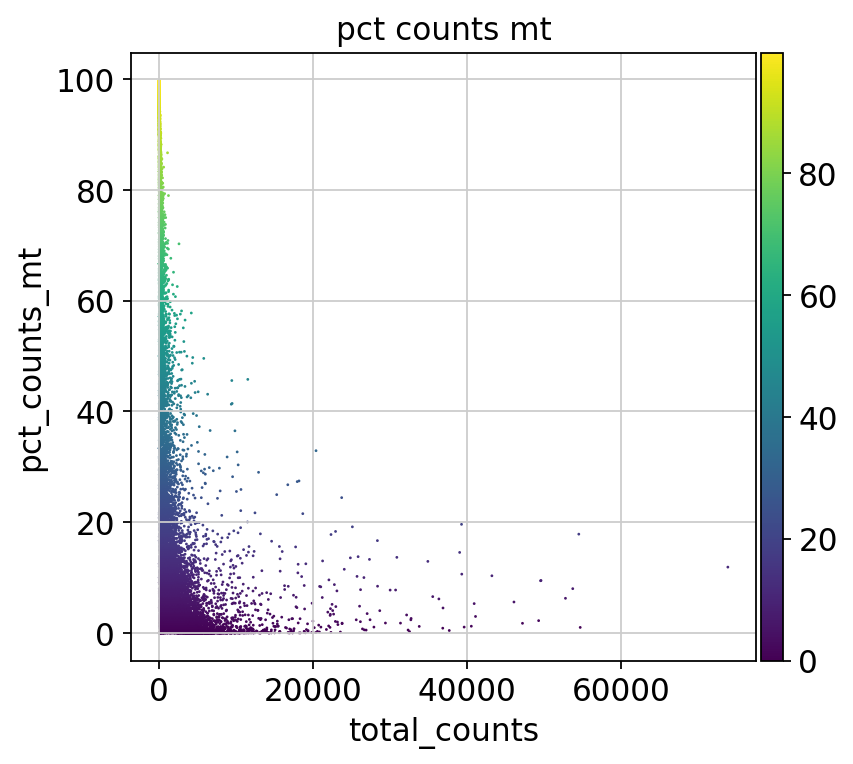

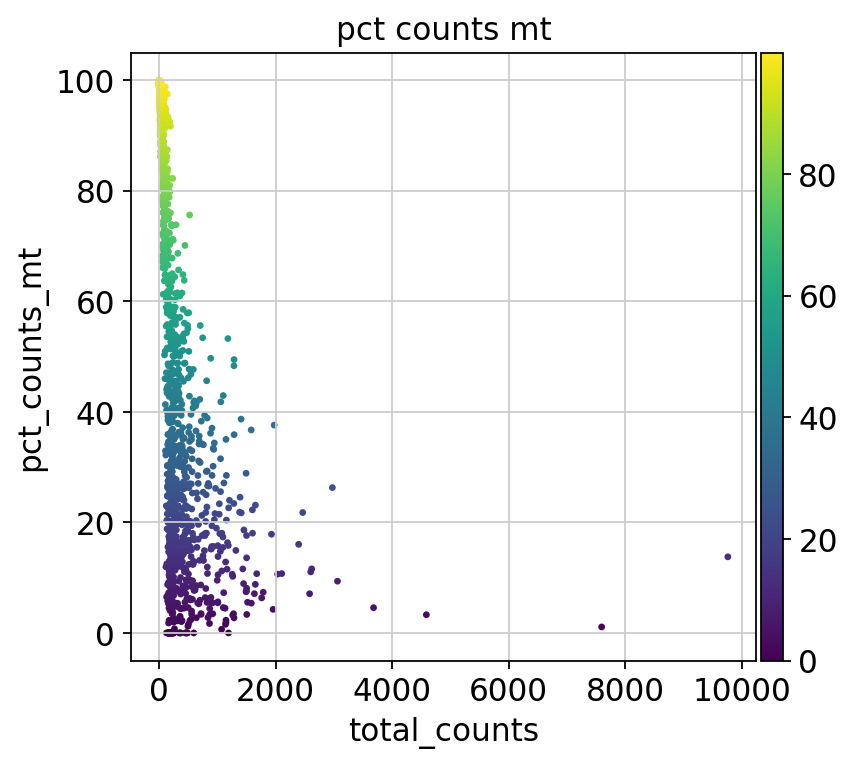

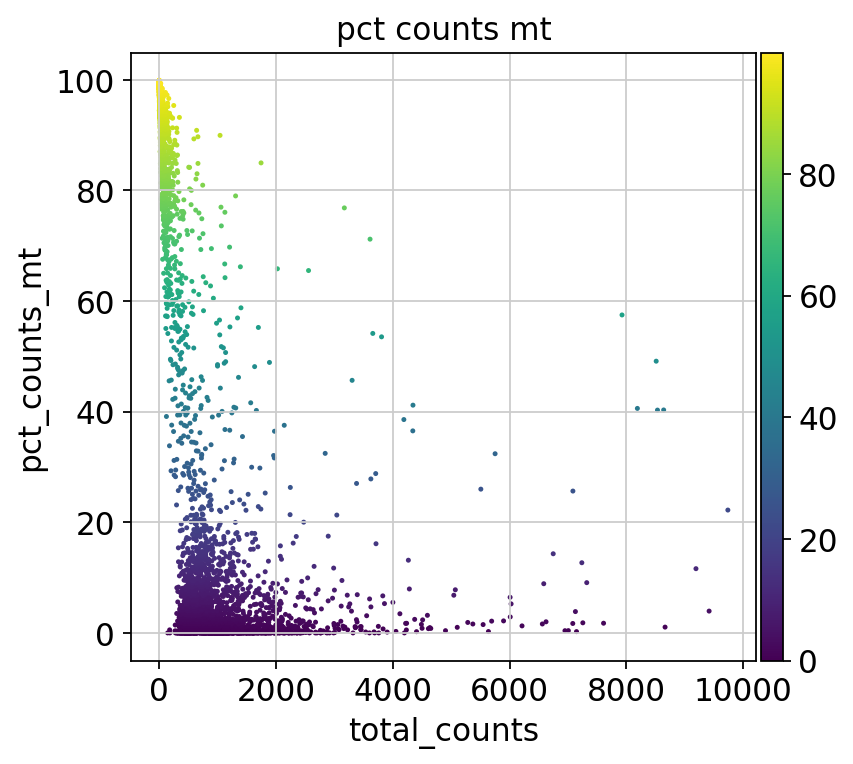

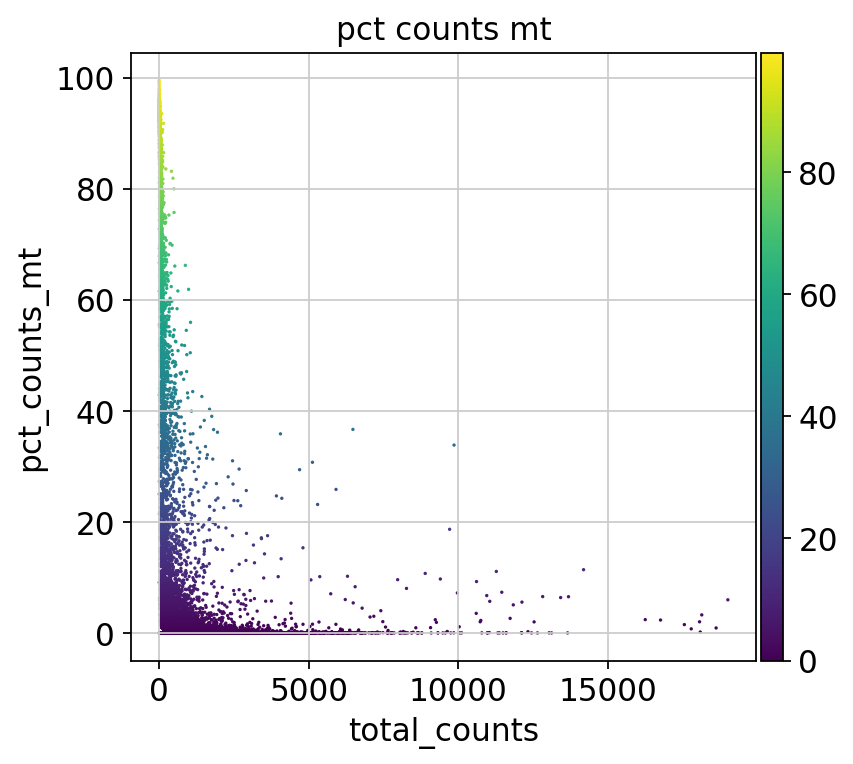

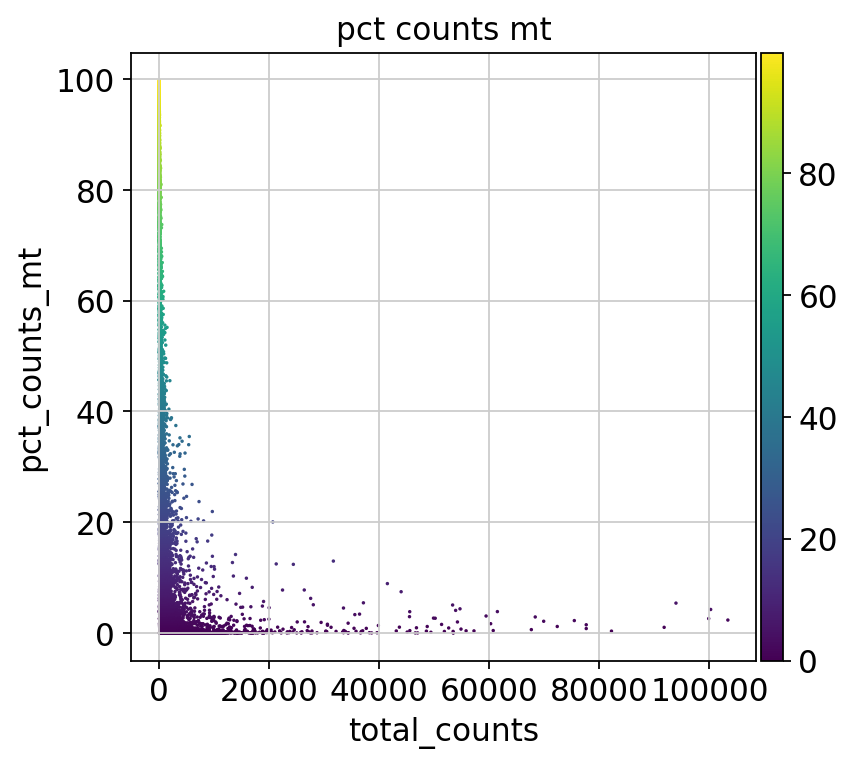

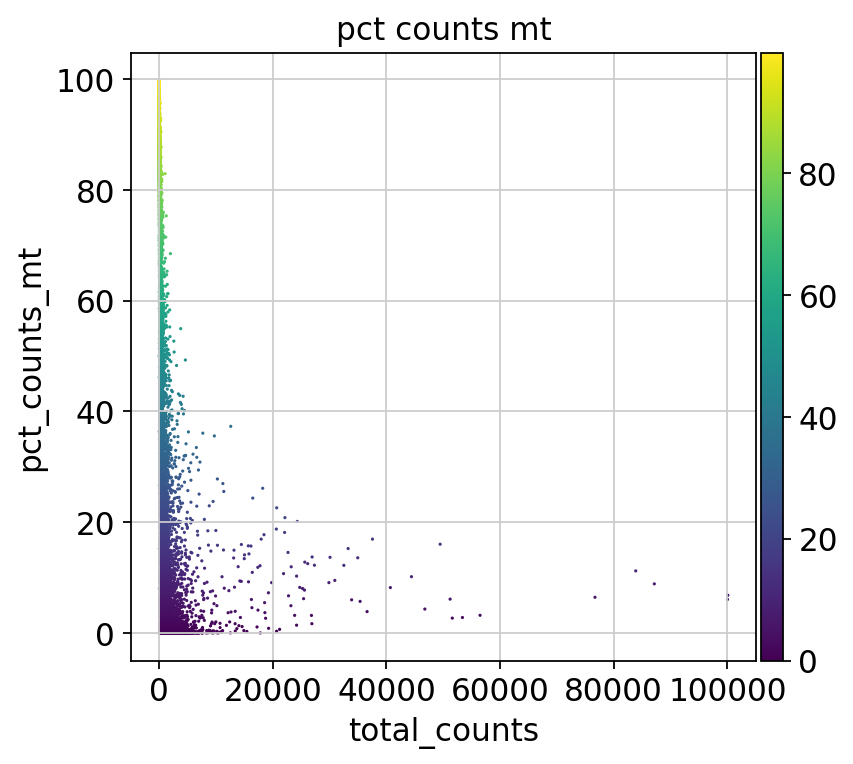

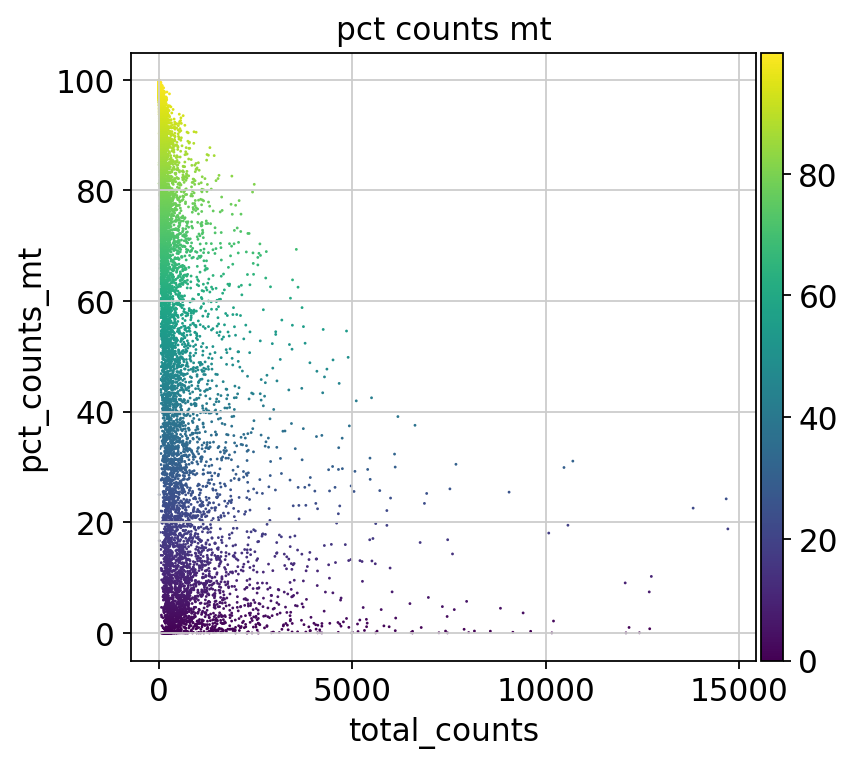

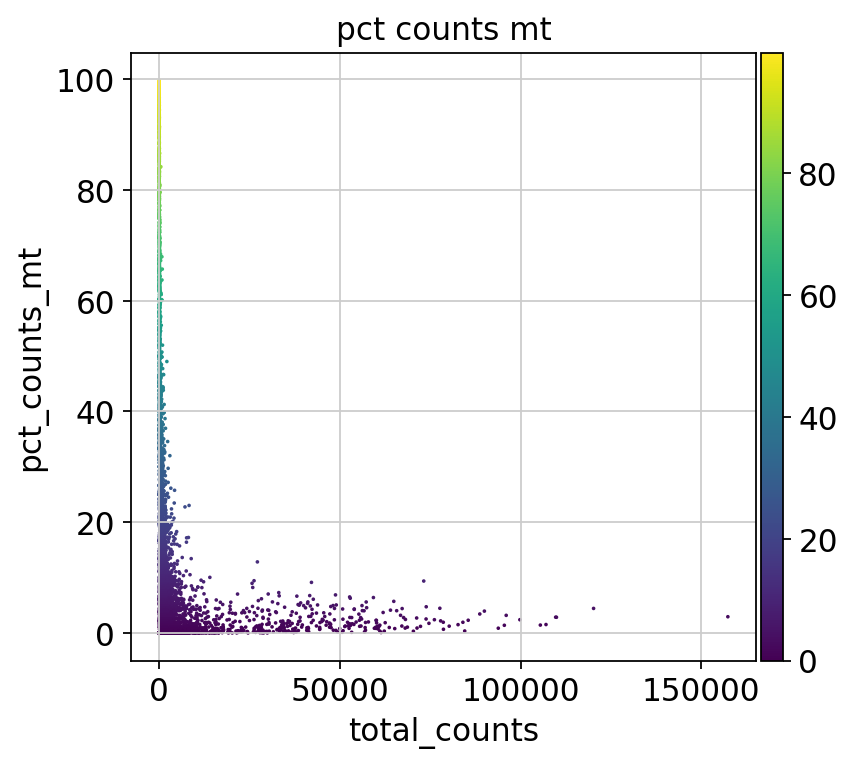

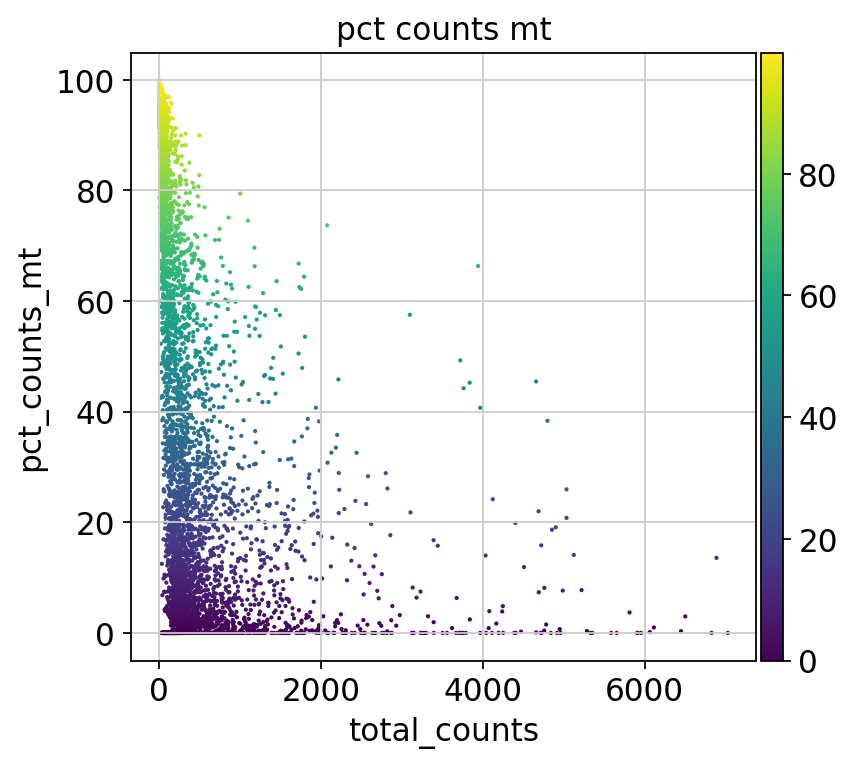

In [17]:
sc.set_figure_params(figsize=[5,5])
for i in range(numberobj):
    sc.pl.scatter(locals()[object_names_preprocessed[i]], x='total_counts', y='pct_counts_mt',color = 'pct_counts_mt',show=False)

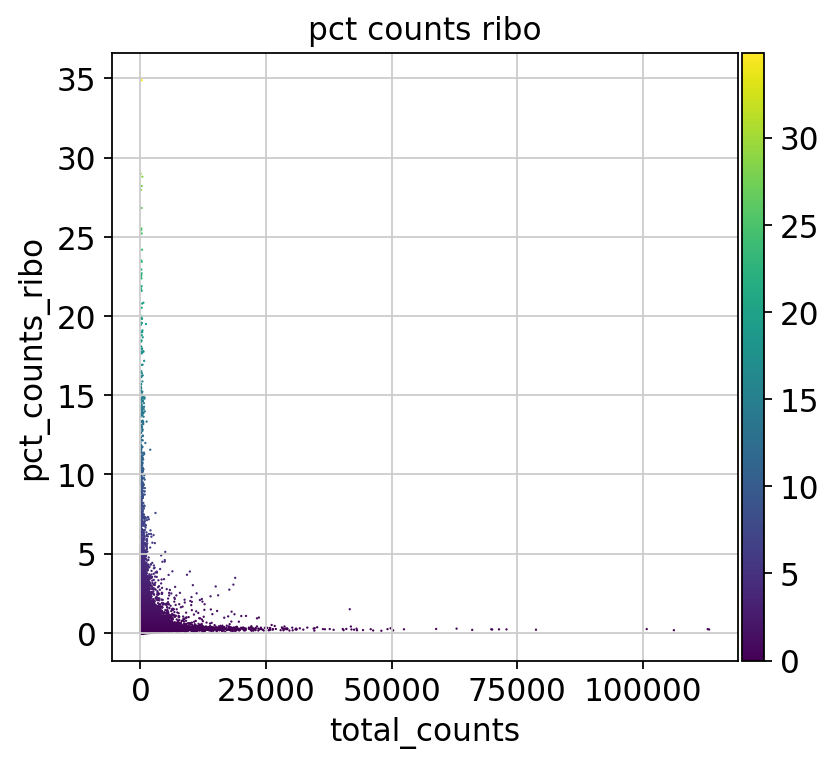

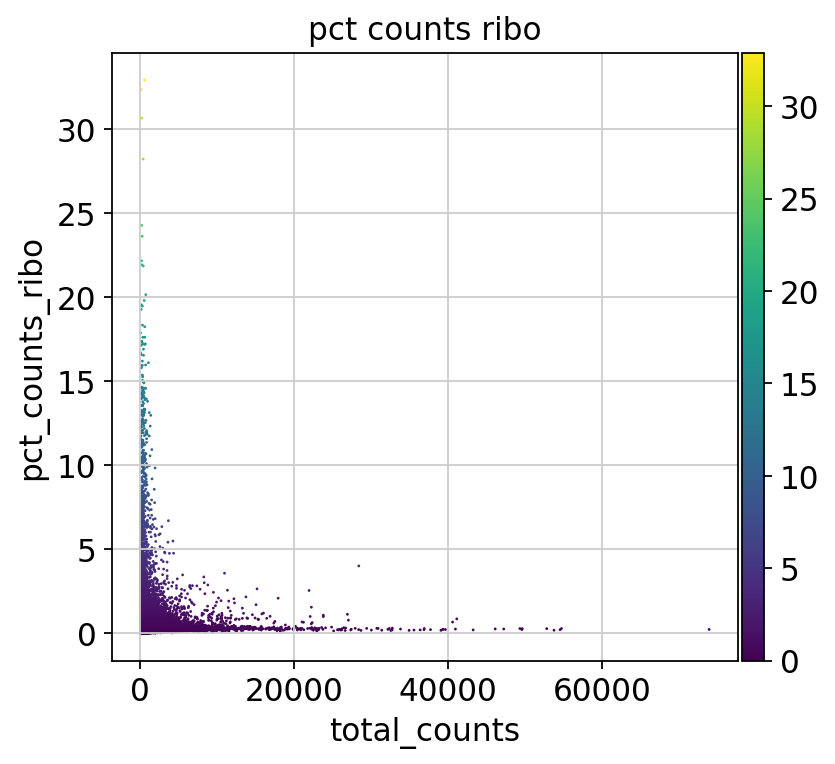

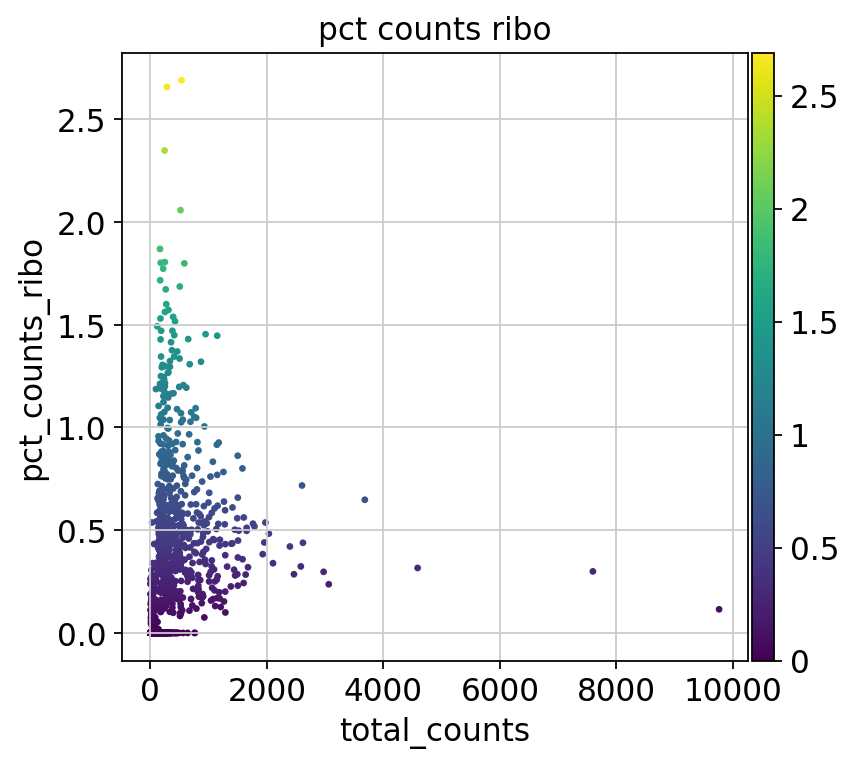

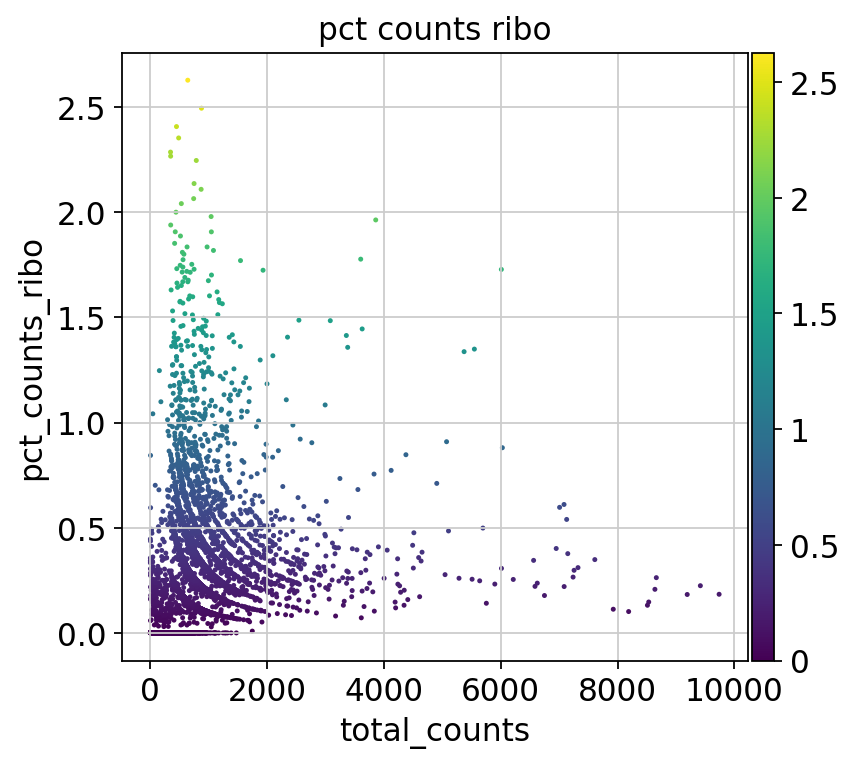

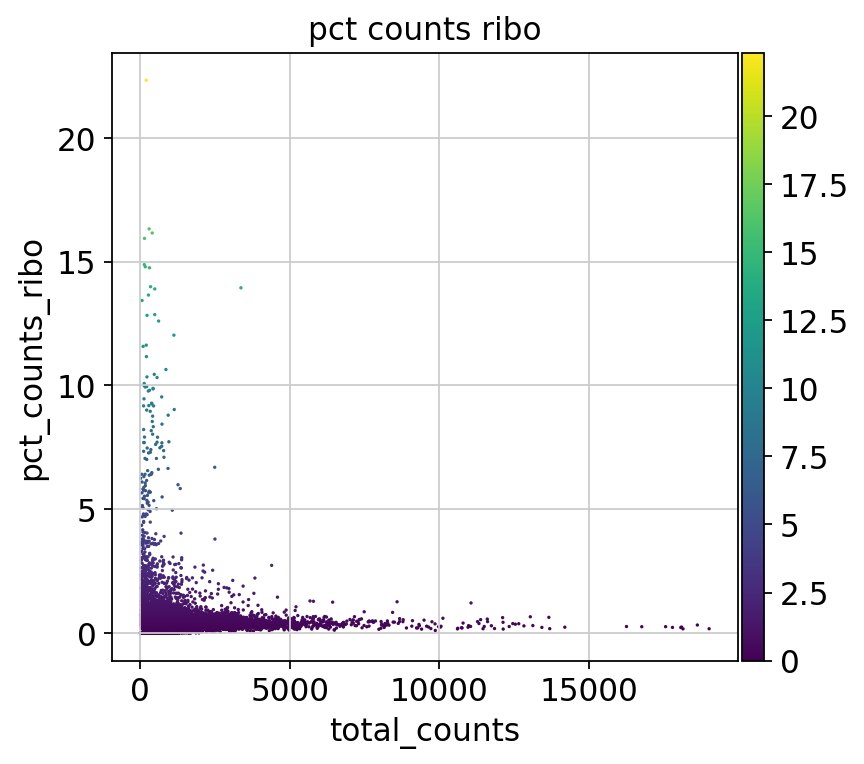

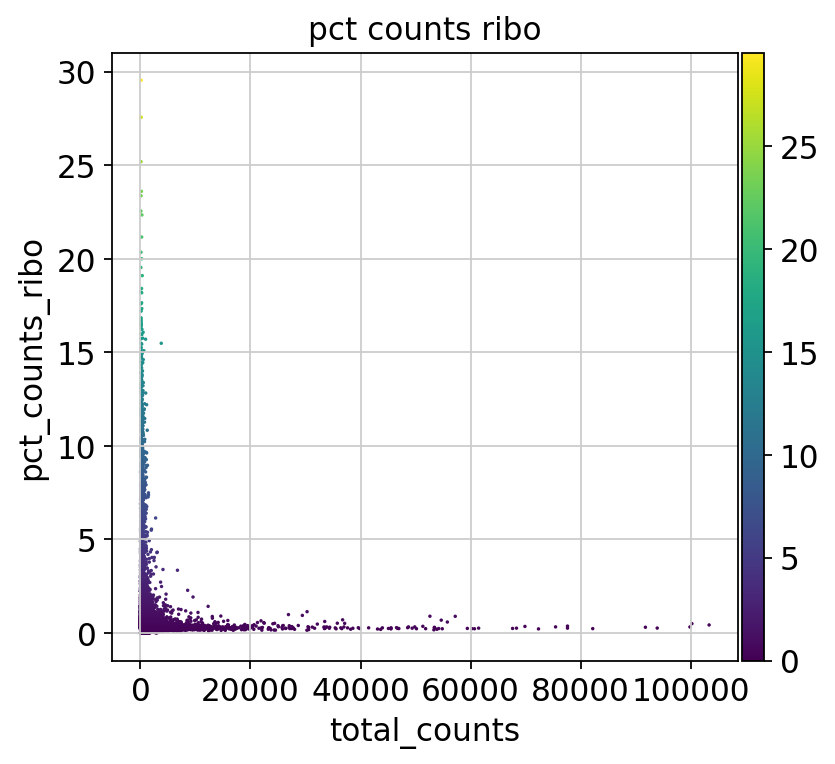

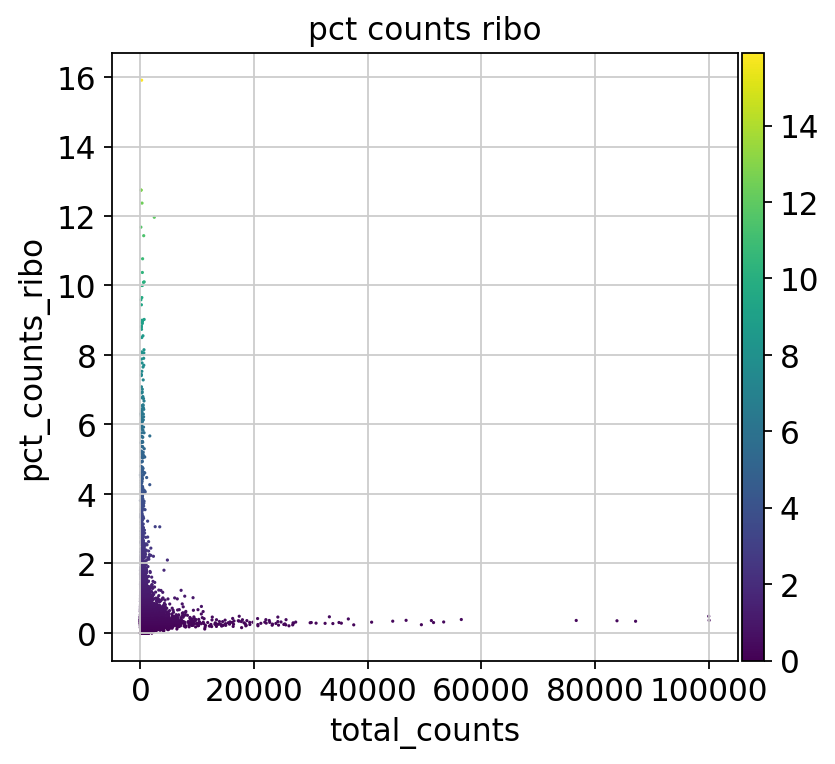

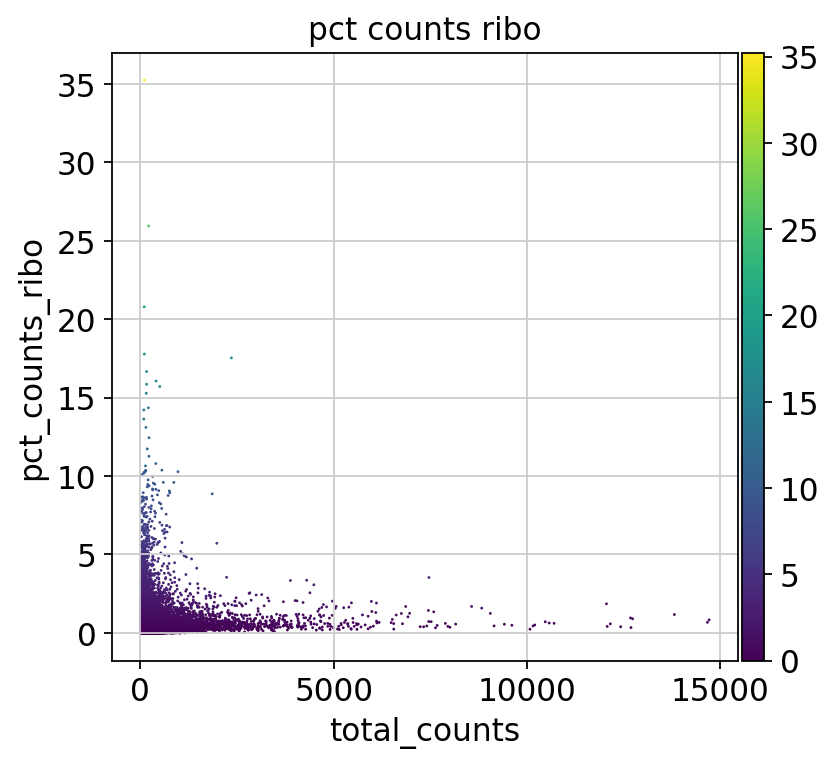

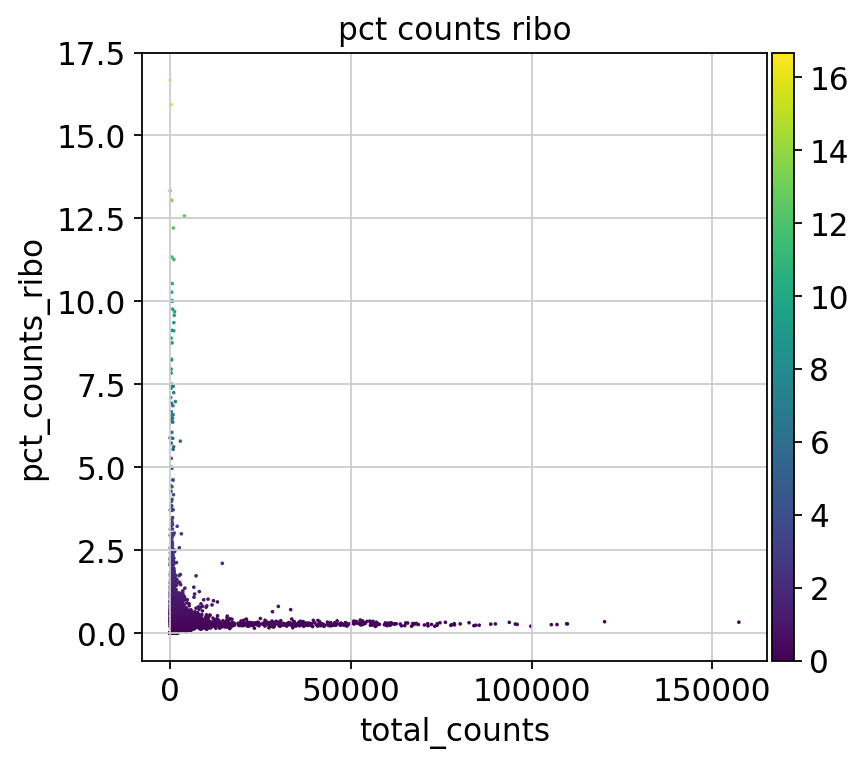

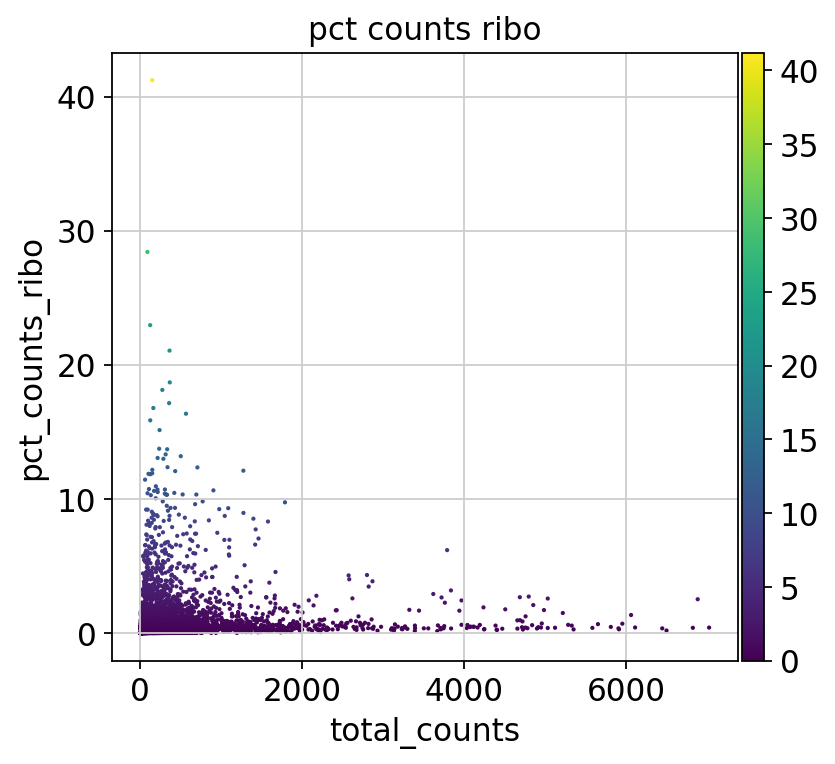

In [18]:
sc.set_figure_params(figsize=[5,5])
for i in range(numberobj):
    sc.pl.scatter(locals()[object_names_preprocessed[i]], x='total_counts', y='pct_counts_ribo',color = 'pct_counts_ribo',show=False)

### Filtering - Mitochondrial% and Ribosomal%
Try 10% first just like many other papers, see later if they form clusters...

In [19]:
max_pct_mt = 10.0 #%, only filters 3 cell or smth
max_pct_ribo = 10.0 #%
for i in range(numberobj):
    locals()[object_names_preprocessed[i]] = locals()[object_names_preprocessed[i]][locals()[object_names_preprocessed[i]].obs['pct_counts_mt'] < max_pct_mt]
    locals()[object_names_preprocessed[i]] = locals()[object_names_preprocessed[i]][locals()[object_names_preprocessed[i]].obs['pct_counts_ribo'] < max_pct_ribo]

## Preprocess - UMIs and gene counts
Here, I want to use some different techniques to plot the data. This is not always necessary, however, you may want to have a close look at your data when you recieve something new. Seaborn package lets us make publication quality and diver plots, while a custom code from the Theis lab, built on Bokeh library, enables interactive plots 

In [20]:
for i in range(numberobj):
    print(locals()[object_names_preprocessed[i]] )

View of AnnData object with n_obs × n_vars = 11153 × 60619
    obs: 'species', 'gender', 'age', 'atlas', 'sample', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet'
View of AnnData object with n_obs × n_vars = 9641 × 60619
    obs: 'species', 'gender', 'age', 'atlas', 'sample', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito'
    

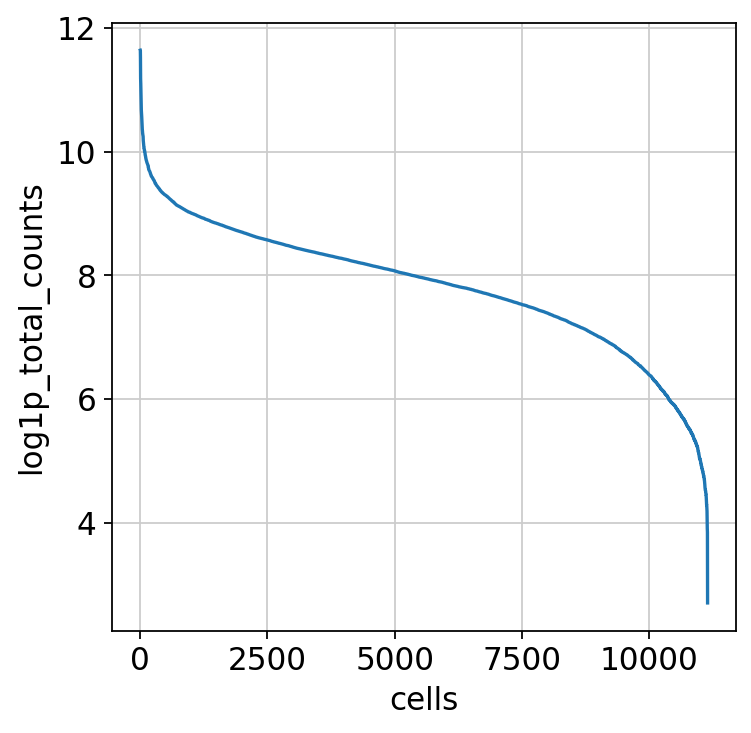

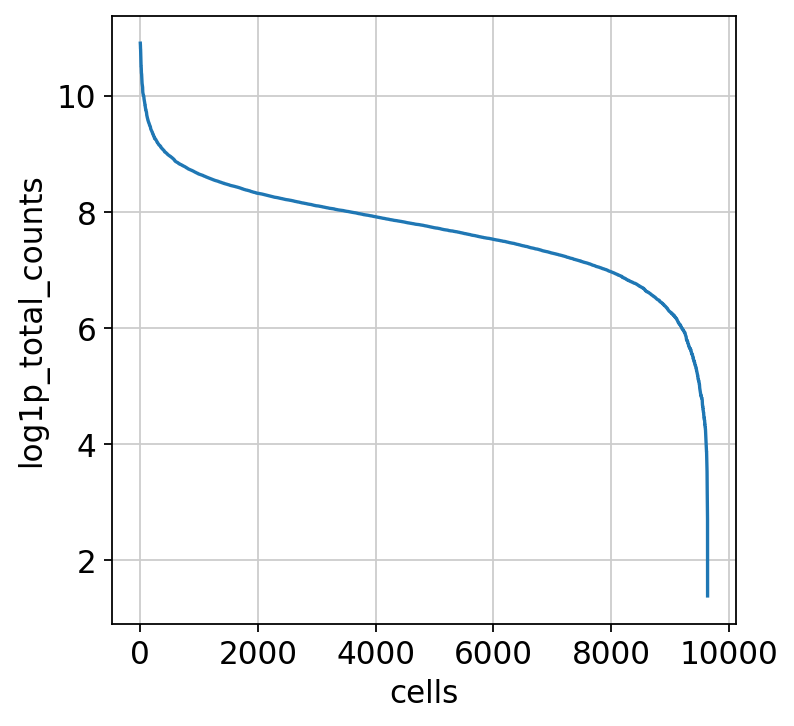

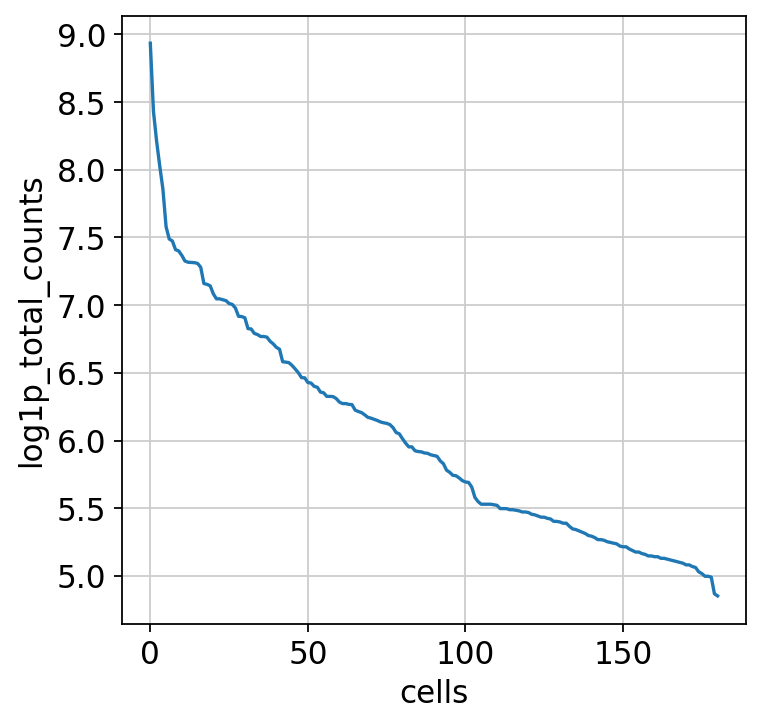

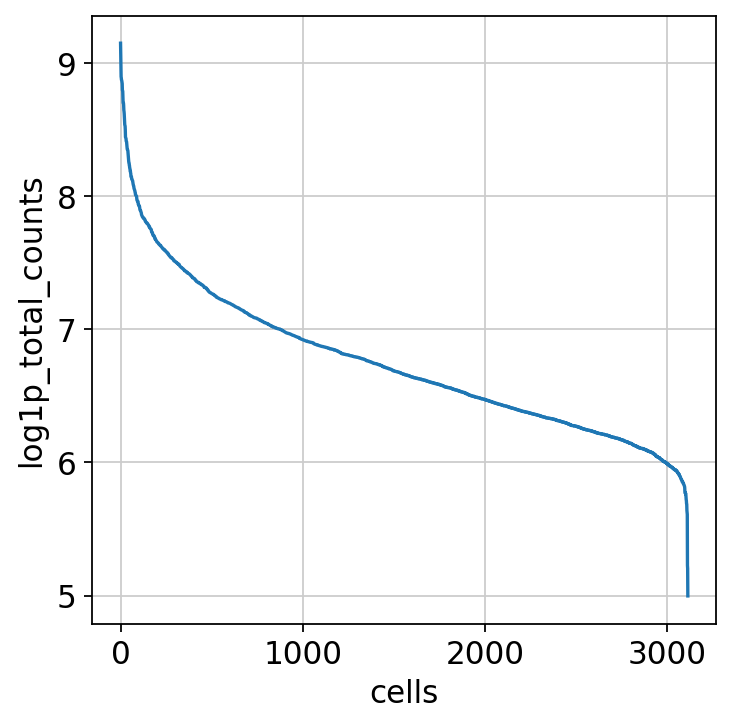

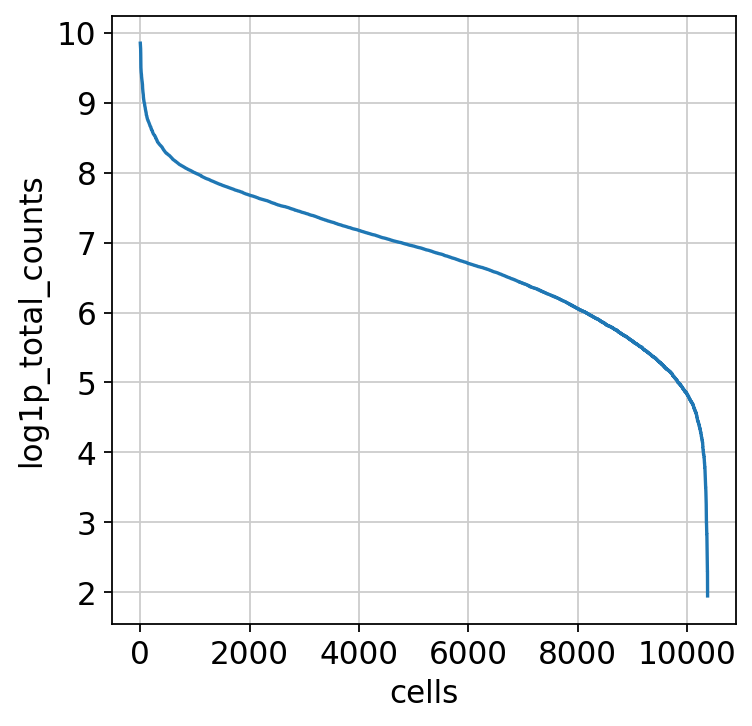

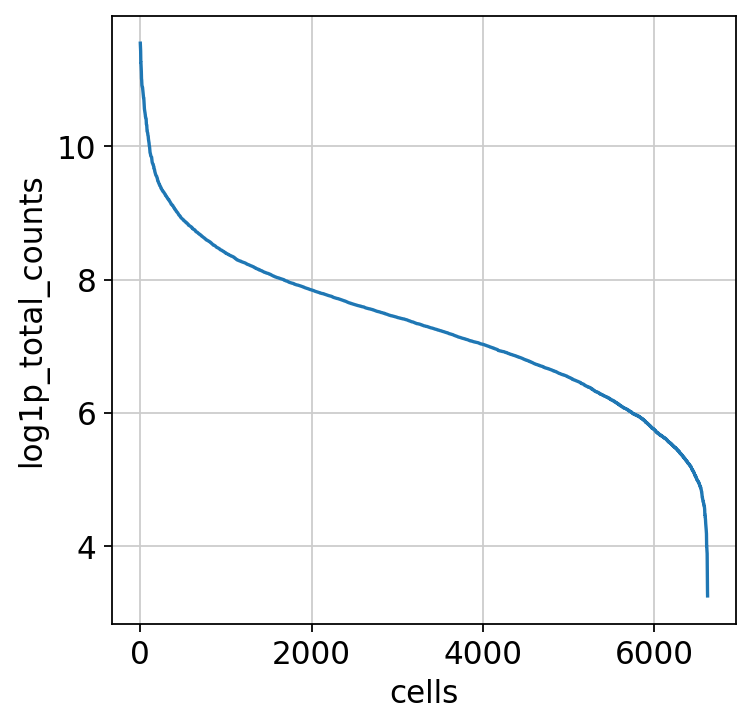

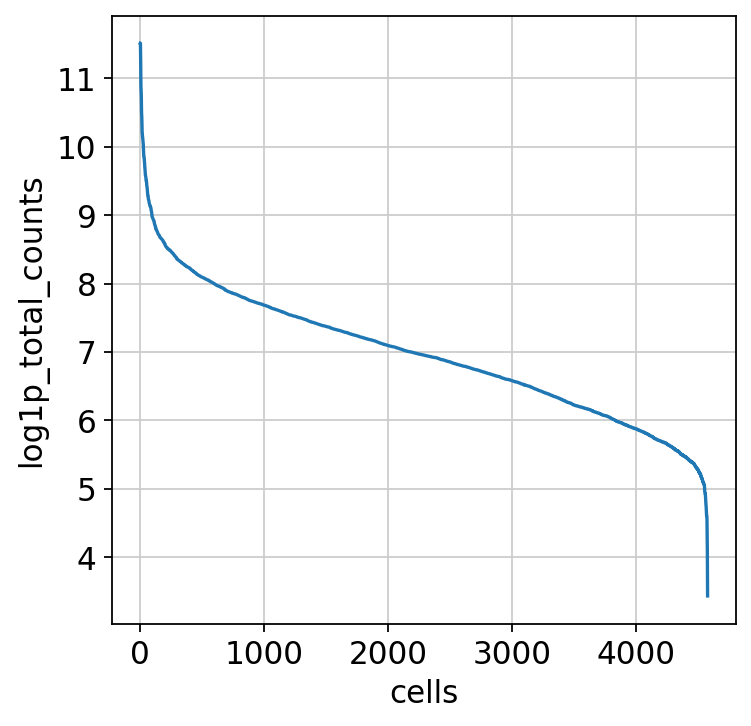

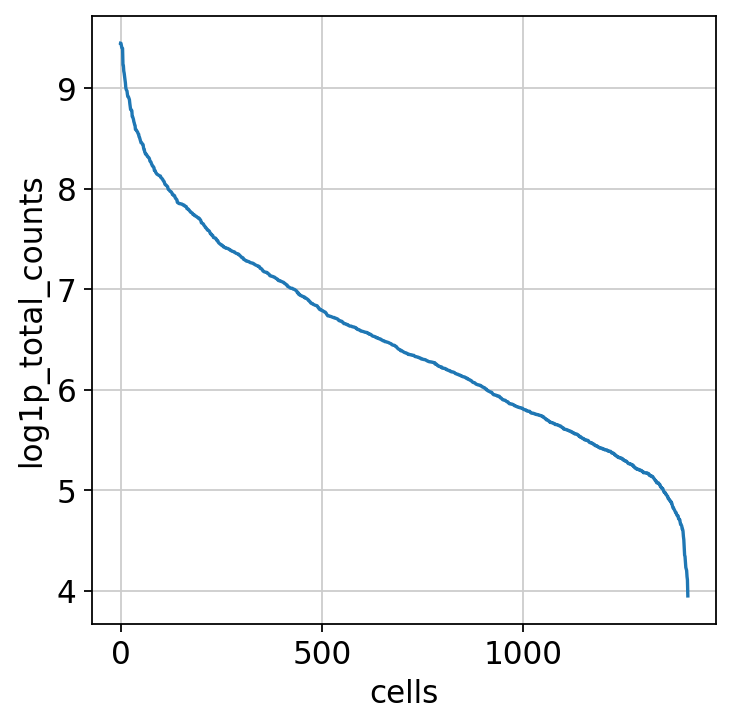

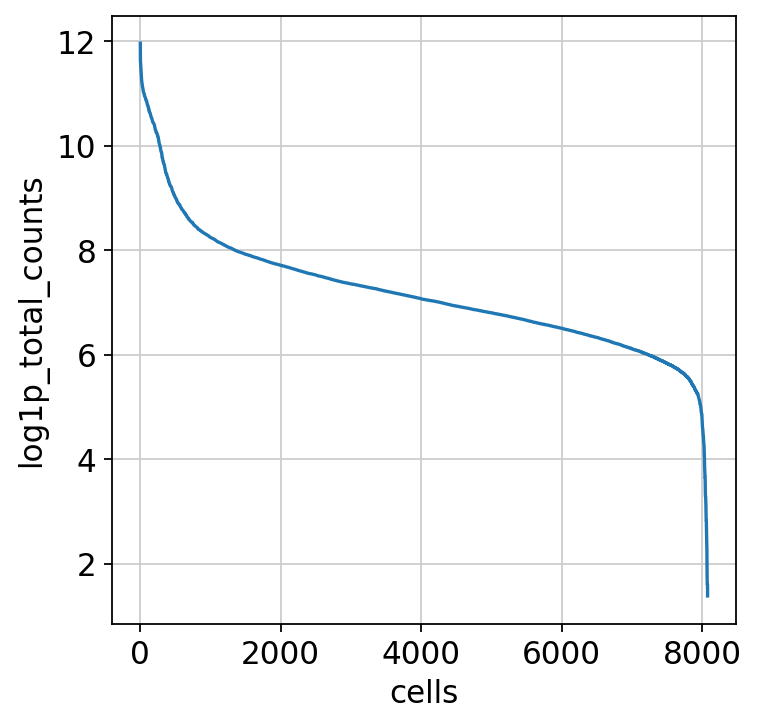

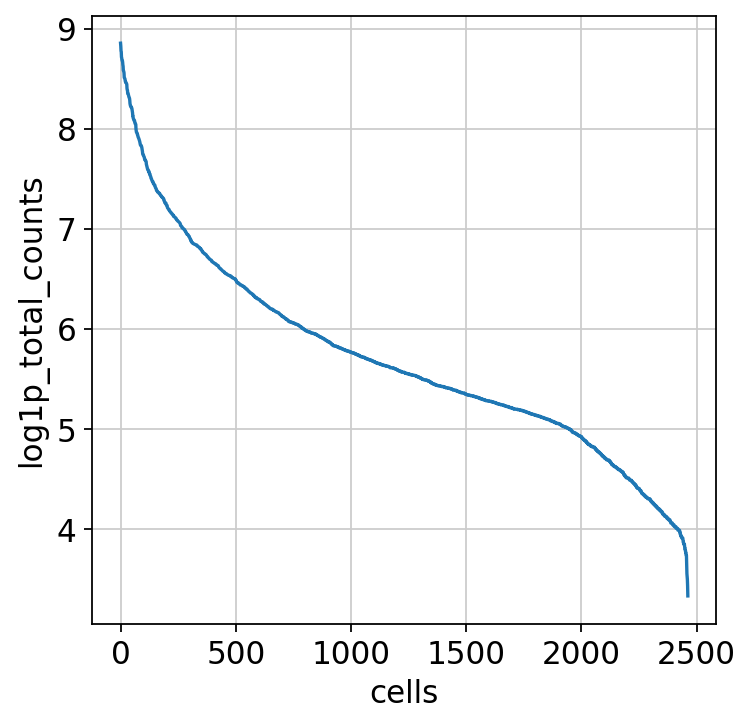

In [21]:
for i in range(numberobj):
    plt.figure()
    total_counts = locals()[object_names_preprocessed[i]].obs['log1p_total_counts'].sort_values(ascending = False)
    index = range(len(total_counts))
    plot = sns.lineplot( x = index, y=total_counts )
    plot.set(xlabel='cells')
    plt.show()

### Seaborn hex plots
These plots allow us to see the distribution of the number of genes and reads, as well as where they are most concentrated (dark colors)

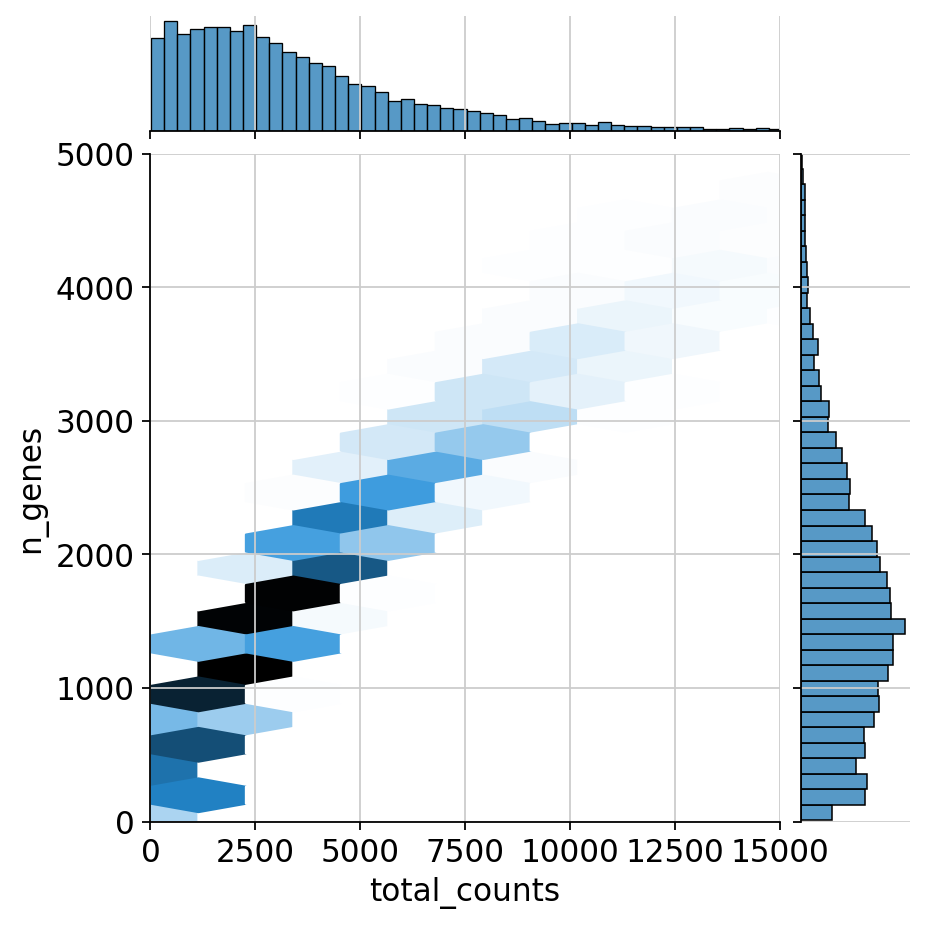

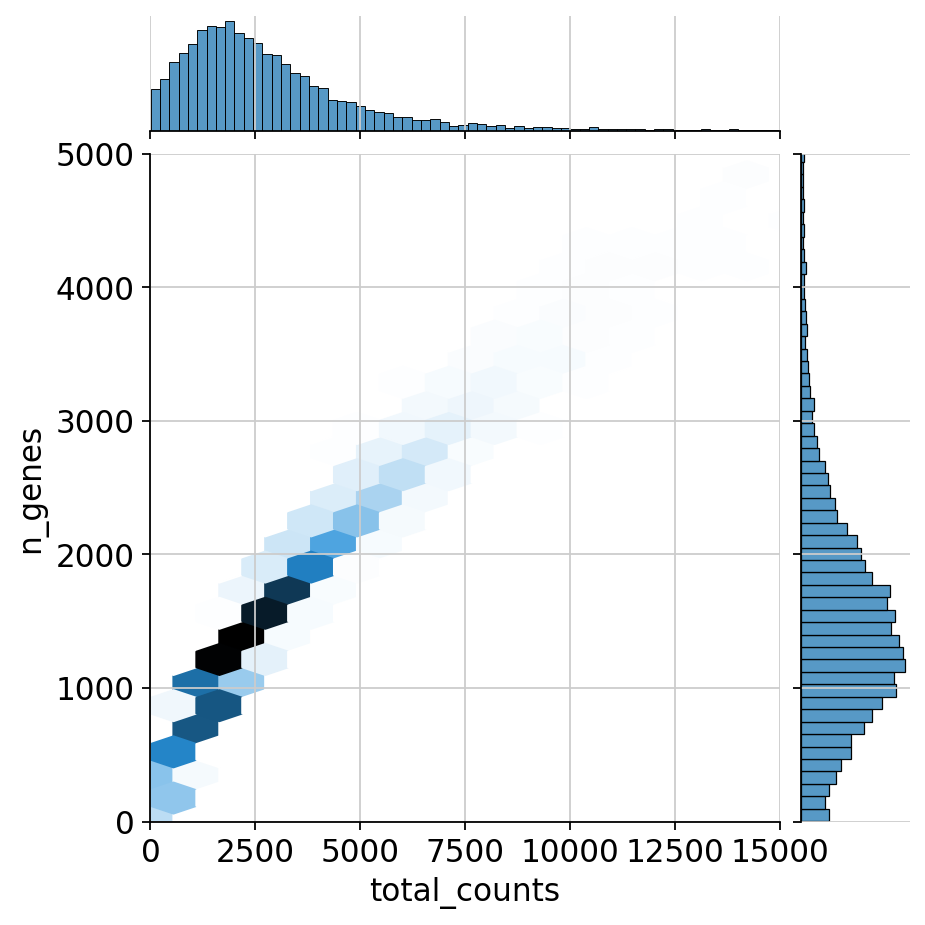

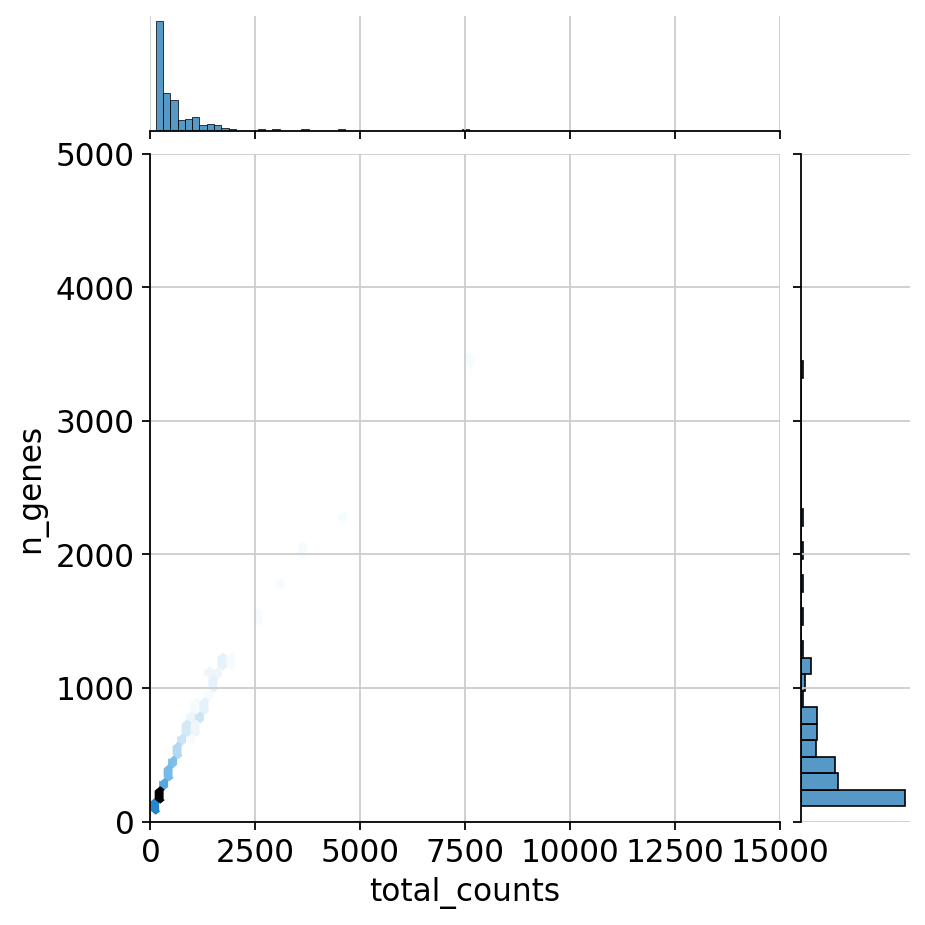

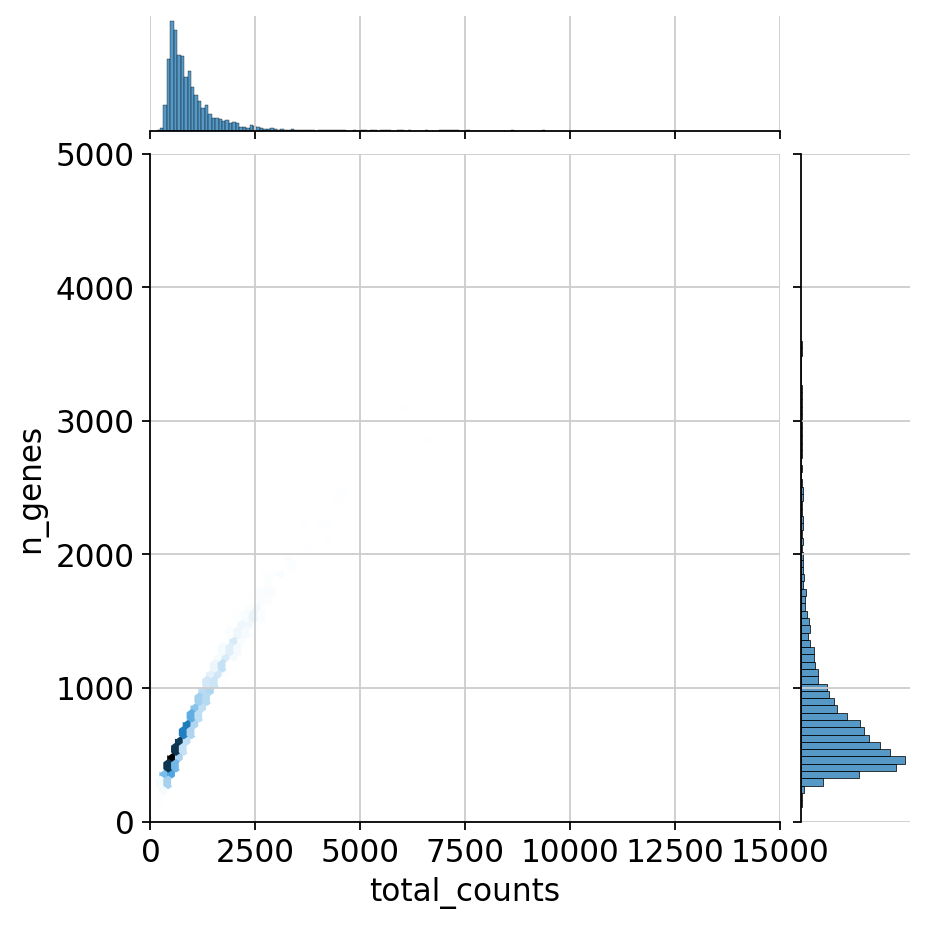

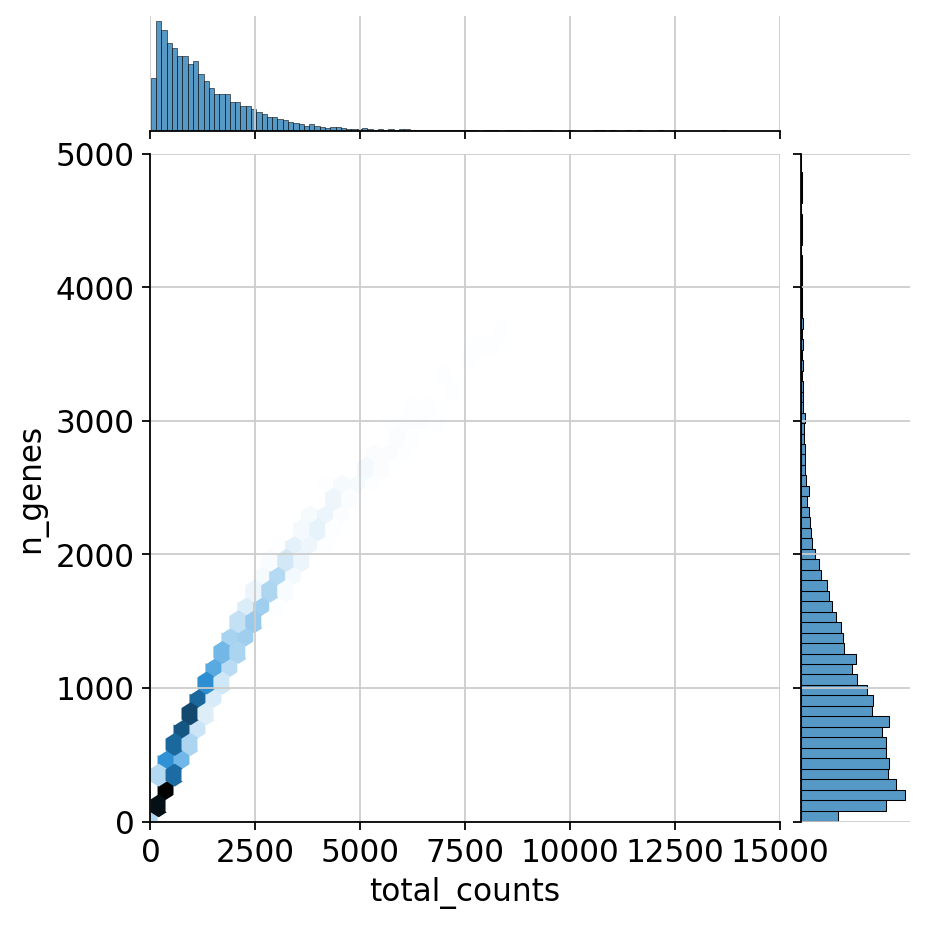

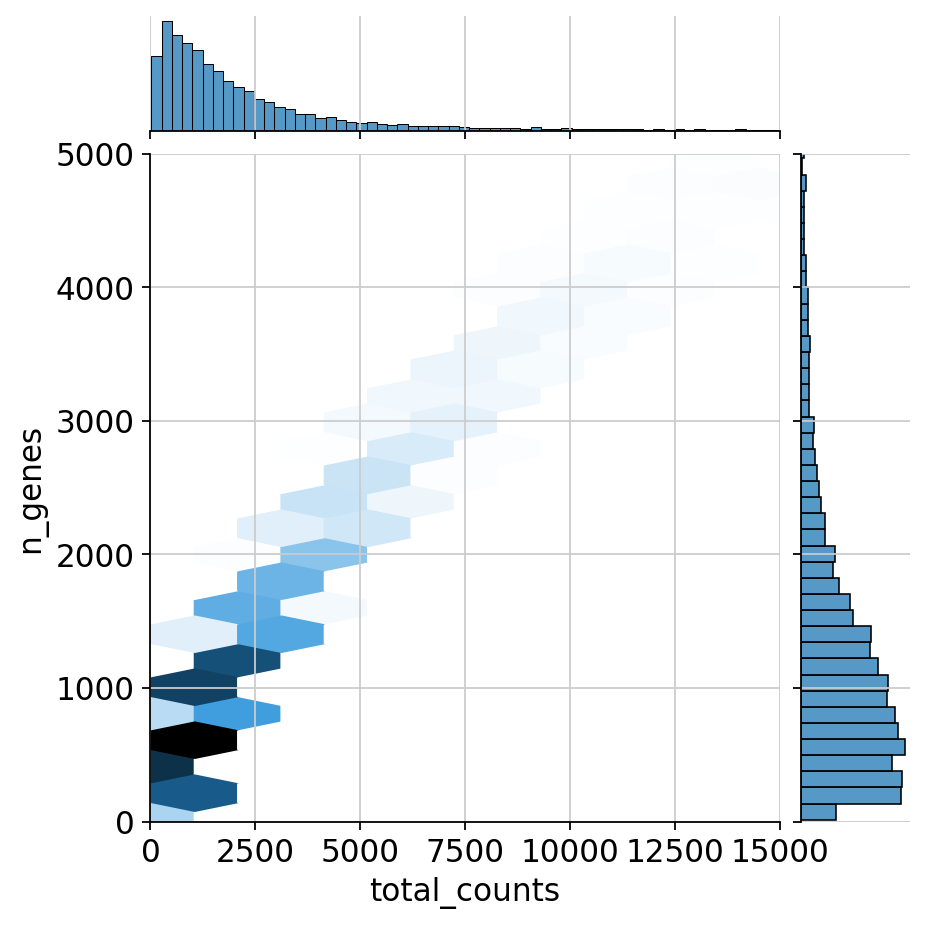

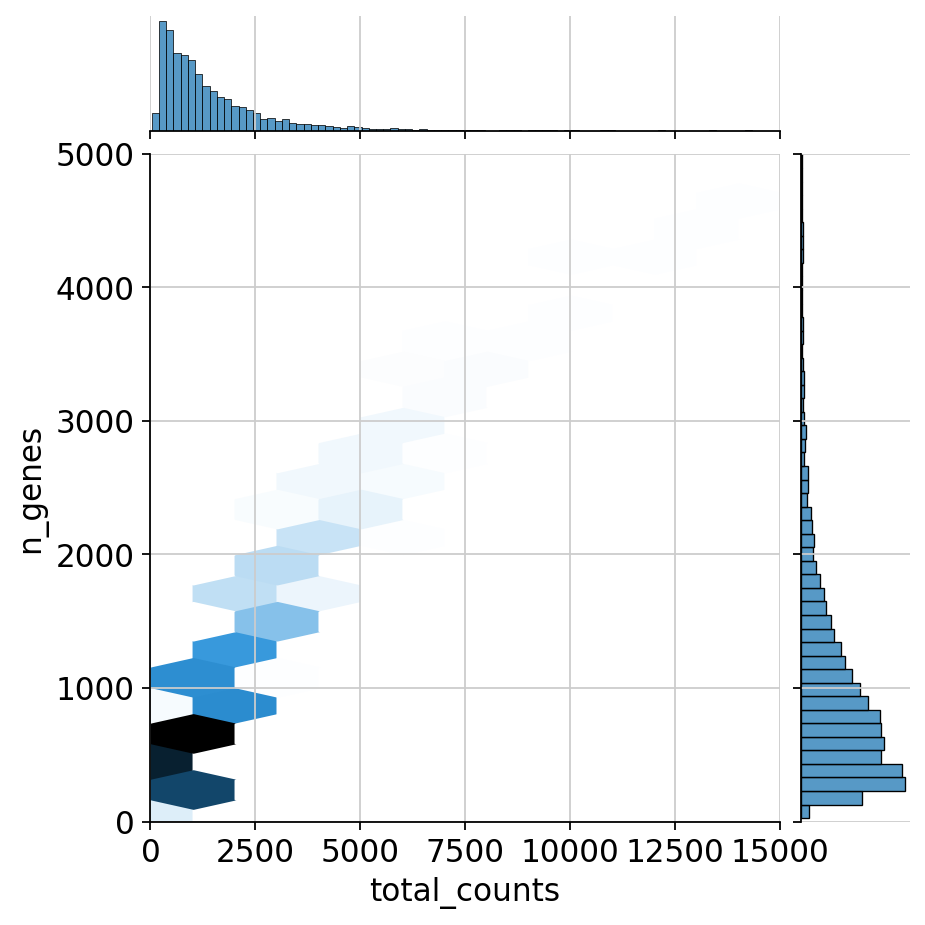

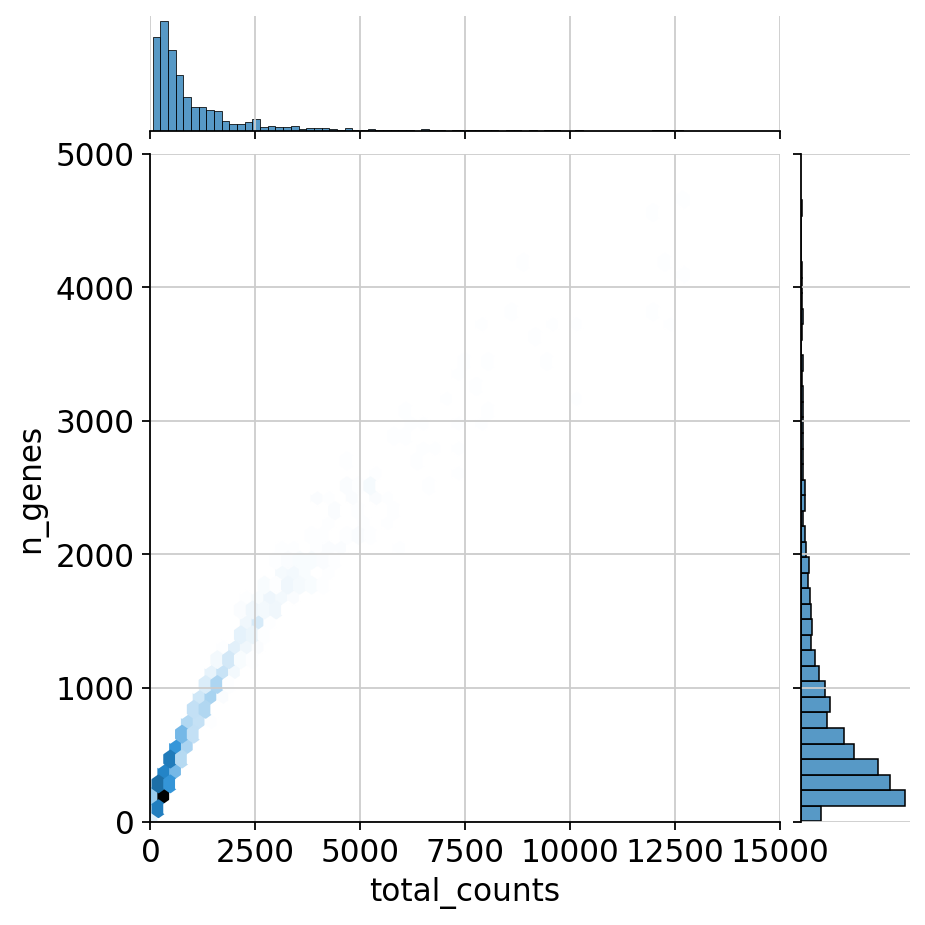

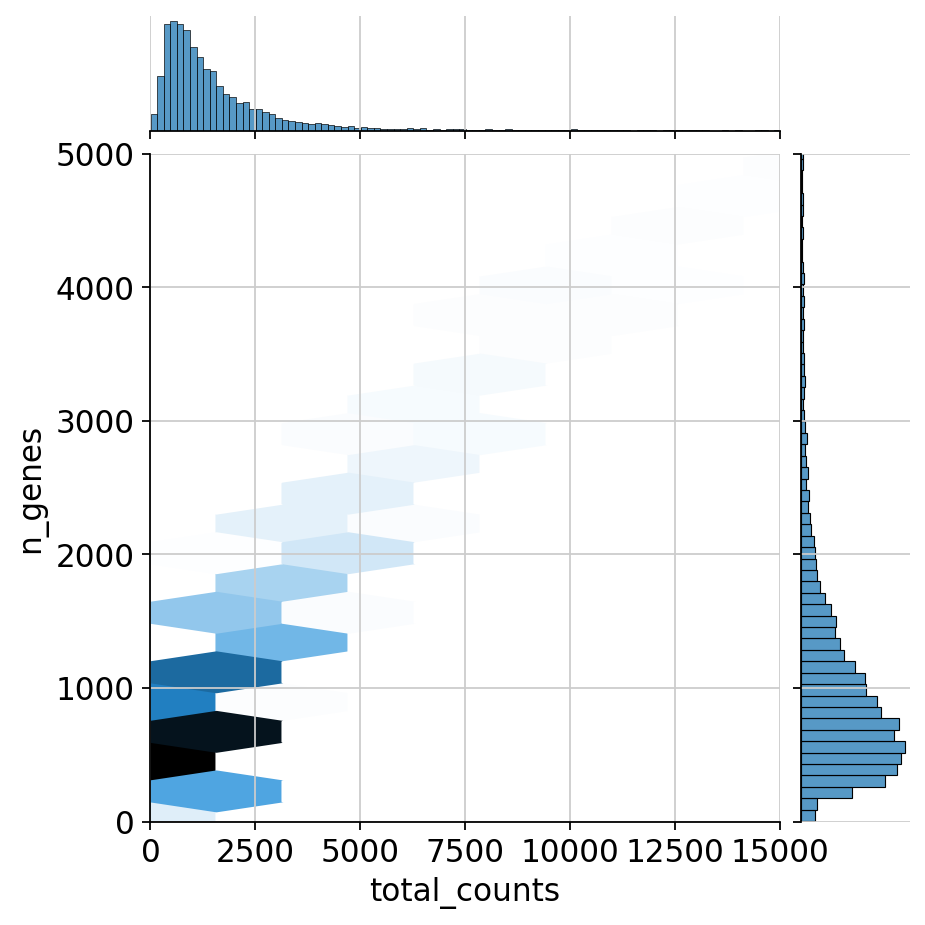

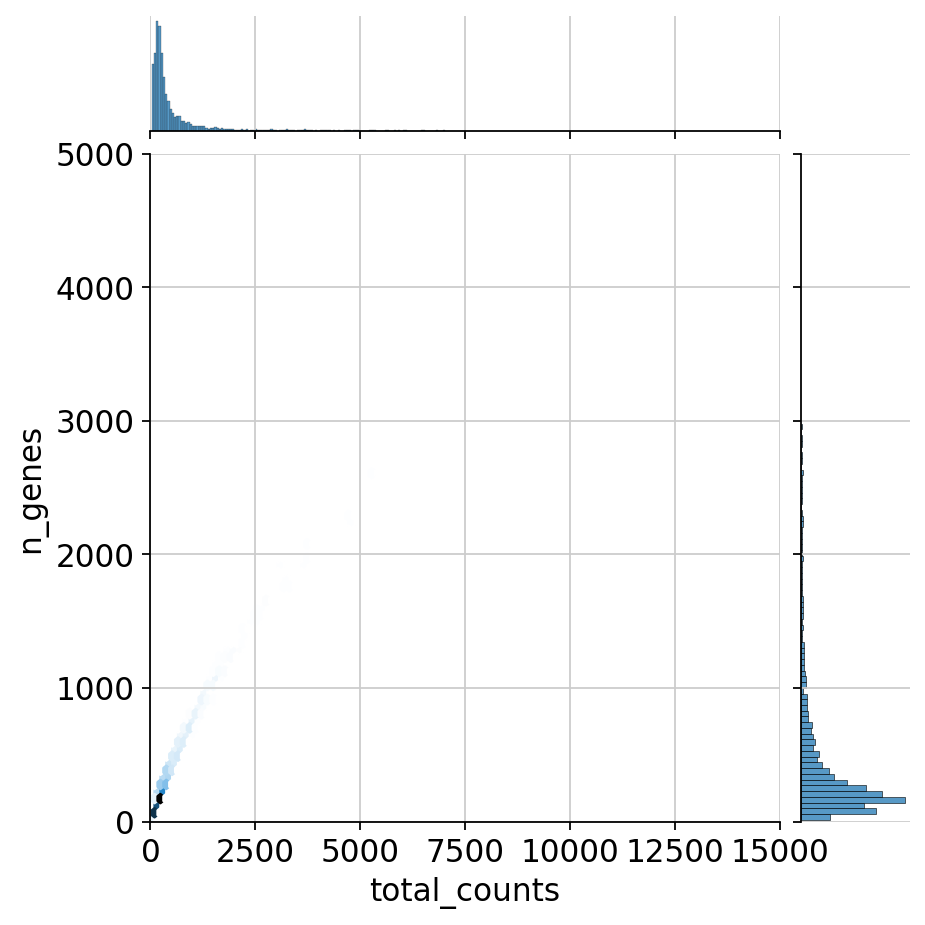

In [22]:
for i in range(numberobj):
    sns.jointplot( x= "total_counts", y= "n_genes", data=locals()[object_names_preprocessed[i]].obs, kind="hex",xlim=[0,15000], ylim=[0,5000])
#kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }

### combined histogram plots
We can compare all libraries to each other using a seaborn histplot

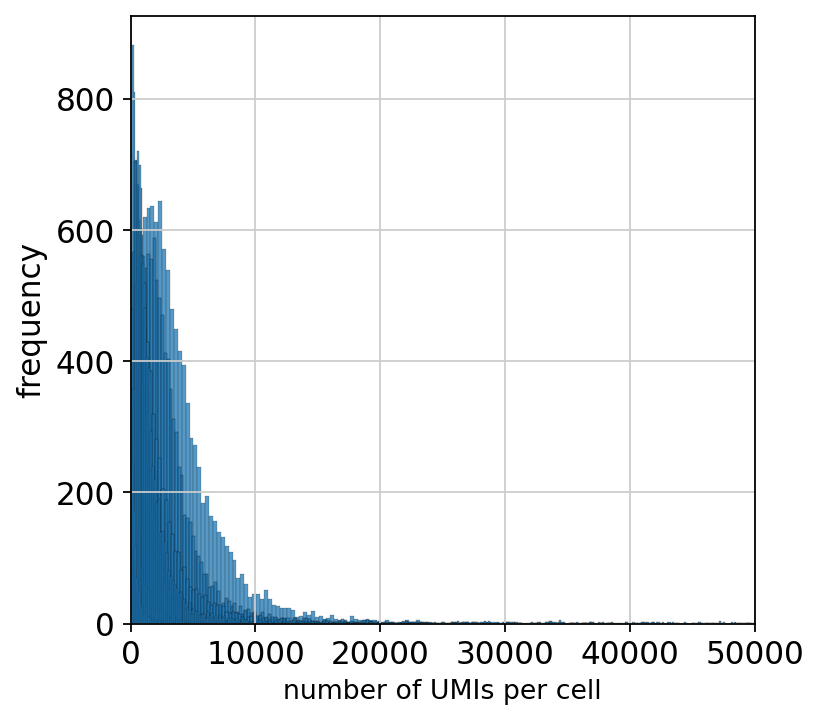

In [23]:

for i in range(numberobj):
    plot = sns.histplot(data=locals()[object_names_preprocessed[i]].obs,x= 'total_counts')
    plot.set_xlabel("number of UMIs per cell", fontsize = 12)
    plot.set_ylabel("frequency", fontsize = 14)
    plot.set_xlim(0,50000)

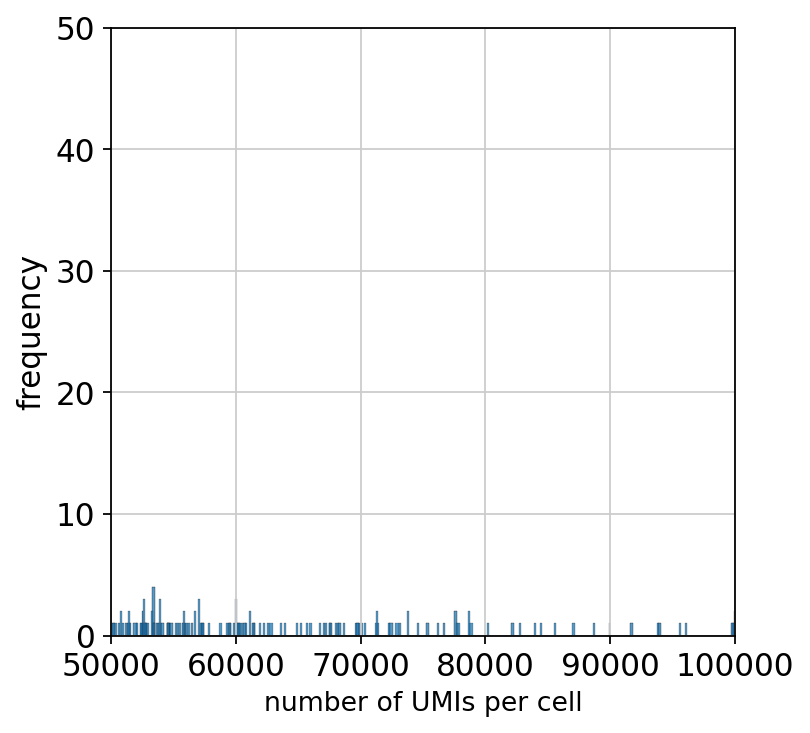

In [24]:

for i in range(numberobj):
    plot2 = sns.histplot(data=locals()[object_names_preprocessed[i]].obs,x= 'total_counts')
    plot2.set_xlabel("number of UMIs per cell", fontsize = 12)
    plot2.set_ylabel("frequency", fontsize = 14)
    plot2.set_xlim(50000,100000)
    plot2.set_ylim(0,50)

### Filtering - UMI and Gene 
Cells with unusual **low/high UMI** counts should be removed. Low counts could be droplets with only ambient RNA while high counts could be doublets. Here we won't filter out cells with high counts as they might represent a celltype. <br>
Similarly cells with unusual **low/high unique gene** counts should be removed. Low gene counts could be droplets with only ambient RNA while high gene counts could be multiplets. <br>
Nonetheless, these thresholds are sample specific and determining them is an iterative process. <br> 

Atlases generally don't have a max gene/UMI threshold as doublets are mostly filtered through methods such as scrublet.

<br>
NOTE: Cell Ranger Count function autmatically filtered out cells with less than 500 UMI counts (might not be the best for heterogenous data). <br>
For more information see: https://www.10xgenomics.com/resources/analysis-guides/common-considerations-for-quality-control-filters-for-single-cell-rna-seq-data 

In [25]:
min_counts = 500 #default
#max_counts = 50000
min_genes = 500
#max_genes = 10000
min_cells = 3



for i in range(numberobj):
    locals()[object_names_preprocessed[i]] = locals()[object_names_preprocessed[i]][locals()[object_names_preprocessed[i]].obs['total_counts']>=min_counts]
    #locals()[object_names_preprocessed[i]] = locals()[object_names_preprocessed[i]][locals()[object_names_preprocessed[i]].obs['total_counts'] < max_counts[i] ]
    locals()[object_names_preprocessed[i]] = locals()[object_names_preprocessed[i]][locals()[object_names_preprocessed[i]].obs['n_genes'] >= min_genes]
    #locals()[object_names_preprocessed[i]] = locals()[object_names_preprocessed[i]][locals()[object_names_preprocessed[i]].obs['n_genes'] < max_genes]
    
    sc.pp.filter_genes(locals()[object_names_preprocessed[i]], min_cells=min_cells)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/hpc/hers_basak/bin/

### Recalculate metrics

In [26]:
for i in range(numberobj):
    sc.pp.calculate_qc_metrics(locals()[object_names_preprocessed[i]], expr_type='counts', var_type='genes', qc_vars=(), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)
    print(locals()[object_names_preprocessed[i]])
    print(locals()[object_names_preprocessed[i]].obs['total_counts'])

AnnData object with n_obs × n_vars = 9826 × 30429
    obs: 'species', 'gender', 'age', 'atlas', 'sample', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'scrublet'
TAATCTCCAAGTTGGG-1    113128
CCCTCTCAGTGCCCGT-1    112840
AACACACCATAGGCGA-1    106133
AATGACCTCTTGGTGA-1    100715
GCCGTGATCTTCTTCC-1     78689
                       ...  
CTTGATTAGTAACGTA-1       586
GCAGCCATCGCGCCAA-1       726
ATCCGTCGTGTCATCA-1       628
CATCCGTTCTTCGCTG-1       622
TGAGGGATCTGTGCAA-1       627
Name: total_counts, Length: 9826, dtype: uint64
AnnData object with n_obs × n_va

AnnData object with n_obs × n_vars = 6149 × 28306
    obs: 'species', 'gender', 'age', 'atlas', 'sample', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'scrublet'
CTGAGGCTCGTCAAAC-1    157332
AACGAAACAGGCTCTG-1    120161
TTAGGCACAAGTGGCA-1    109674
ATGAGTCAGGATACGC-1    109896
CGGGCATTCGATGCTA-1    107025
                       ...  
CTCCACACAAAGTGTA-1       585
GTCTGTCAGAAGTATC-1       586
CACAACACAGTTGCGC-1       628
CAATTTCTCTCGACGG-1       570
CTGTACCGTGACTCGC-1       643
Name: total_counts, Length: 6149, dtype: uint64
AnnData object with n_obs × n_va

In [27]:
object_names_filtered =list()

for i in range(numberobj):
    object_names_filtered.append("adata"+"_"+names[i])
    locals()[object_names_preprocessed[i]] = locals()[object_names_preprocessed[i]].copy()

In [28]:
for i in range(numberobj):
    locals()[object_names_preprocessed[i]].write(os.path.join('data/filtered_wang_base_'+object_names_filtered[i][6:]+'.h5ad'))

In [29]:
!ls data

filtered_agarwal_base_GSM4157068.h5ad
filtered_agarwal_base_GSM4157069.h5ad
filtered_agarwal_base_GSM4157070.h5ad
filtered_agarwal_base_GSM4157072.h5ad
filtered_agarwal_base_GSM4157074.h5ad
filtered_agarwal_base_GSM4157076.h5ad
filtered_agarwal_base_GSM4157078.h5ad
filtered_altena_base_g004.h5ad
filtered_altena_base_g005.h5ad
filtered_altena_base_g011.h5ad
filtered_altena_base_g012.h5ad
filtered_altena_base_g013.h5ad
filtered_altena_base_g014.h5ad
filtered_altena_base_g015.h5ad
filtered_altena_base_g016.h5ad
filtered_altena_base_g017.h5ad
filtered_altena_base_g018.h5ad
filtered_altena_base_g019.h5ad
filtered_altena_base_g020.h5ad
filtered_siletti_base_S173_3.h5ad
filtered_siletti_base_S173_4.h5ad
filtered_siletti_base_S173_5.h5ad
filtered_siletti_base_S175_7.h5ad
filtered_siletti_base_S175_8.h5ad
filtered_siletti_base_S176_1.h5ad
filtered_siletti_base_S176_2.h5ad
filtered_siletti_base_S193_1.h5ad
filtered_siletti_base_S193_2.h5ad
filtered_siletti_base_S194_4.h5ad
filtered_siletti_base_